# Notebook for Visualizations

This notebook can be thought of as the notebook for our Notebook Bonus, although it contains only the code for visualization.

In our project, we tried to replicate the study "Comparing deep learning and concept extraction based methods for patient phenotyping from clinical narratives." The authors of that study stated that although extracting characteristics about patients from natural language clinical notes is important, because those documents contain a lot of information not found in structured medical codes, existing methods for doing that (which relied on non-deep learning methods) were often very labor intensive (because they required experts to create dictionaries of terms relevant for deciding if patients had or lacked a certain condition). They then proposed a CNN architecture for performing binary classification on discharge summaries to determine if the patients described in them had or lacked various conditions, which they claimed would be easier to use and achieve better results.

The CNNs created according to their architecture could consider various combinations of n-grams. For each of the ten conditions which they (and we) considered, they (and we) created 6 CNNs, one of which considered unigrams, the second which considered unigrams and bigrams, the third which considered unigrams, bigrams, and trigrams, the fourth which considered unigrams, bigrams, trigrams, and 4-grams, the fifth which which considered unigrams, bigrams, trigrams, 4-grams, and 5-grams, and the sixth which considered bigrams, trigrams, 4-grams, and 5-grams. A CNN constructed according to their architecture would take in documents represented as stacks of word embedding vectors created using Word2Vec, and then for each n-gram size considered by that CNN, apply 100 filters of that size to the document, apply a ReLU to the results of that convolutional layer, perform global max pooling to condense the results of each filter to a single value, put those values into a fully-connected layer to create two values, and pass those two values through a log-softmax to generate the final output. If the first output value was bigger than the second, then the CNN would classify the patient described by the discharge summary as not having the condition. Otherwise, the CNN would classify the patient as having the condition.

We attempted to replicate the experiments from this study. We preprocessed the documents in "preprocessing_for_cnn.ipynb", trained and tested the CNNs in "notebook_for_cnns.ipynb", trained and tested some baseline logistic regression models operating on documents represented as bags of words (1-grams) and various n-grams in "Bag_of_words.ipynb" and "N-grams_bag_of_words.ipynb", and visualize our results here. We also display the results of performing two ablations.

All in all, we did not manage to replicate the experiments successfully. Some discussion about the errors we encountered can be found in our main report.

Here, we import the libraries needed to load and visualize the data.

In [ ]:
import json
import matplotlib.pyplot as plt 
import numpy as np
import os

Here, we connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Here, we move to the directory containing the necessary files. If you did not upload this folder to your Google Drive directly, but someone shared it to you, you will need to create a shortcut to "DLH project" in your Google Drive to do this.


In [ ]:
os.chdir("/content/drive/MyDrive/DLH project")

Here, we find the name of the most recent results file

In [ ]:
max_index_results_file = 0
for filename in os.listdir():
    split_filename = filename.split(".")
    if split_filename[0].startswith("results_") and split_filename[1] == "json":
        index = int(split_filename[0][8:])
        if index > max_index_results_file:
            max_index_results_file = index

results_file_name = "results_" + str(max_index_results_file) + ".json"
print(results_file_name)

# results_1.json -> seed = 3
# results_2.json -> seed - 0, incorrect intialization of FC layer
# results_3.json -> seed - 0, changed initialization of FC layer, used to be N(0.01, 1) (incorrect), changed to N(0, 0.01) -> bad results
# results_4.json -> seed - 1, changed initialization of FC layer, used to be N(0.01, 1) (incorrect), changed to N(0, 0.01) -> bad results
# results_5.json -> seed - 1, no initialization -> results better than using correct initialization for FC and convolutional
# results_6.json -> seed - 1, initialized convolutional layers like in paper, did not initialize FC layer, seed = 0 -> fine, but bad for obesity
# results_7.json -> seed - 0, initialized convolutional layers like in paper, did not initialize FC layer, seed = 0 -> fine, bad for obesity

results_7.json


Here, we load the results of our most recent run of our implementations of the CNNs proposed in the paper, and print them out.

For each CNN for each condition, we stored the training time, the percent of the test patients predicted to have the condition, the actual percent of test patients with the condition, and the precision, recall, F1-score, and area under the ROC curve for that CNN.


In [ ]:
with open(results_file_name, 'r') as f:
    results_dict = json.load(f)
print(json.dumps(results_dict, indent = 4))

{
    "Advanced.Cancer": {
        "[1]": {
            "training time": 9.548596620559692,
            "predicted percent positive": 0.05970149253731343,
            "actual percent positive": 0.12313432835820895,
            "accuracy": 0.9216417910447762,
            "precision": 0.875,
            "recall": 0.42424242424242425,
            "f1": 0.5714285714285714,
            "auc": 0.9455834945196647
        },
        "[1, 2]": {
            "training time": 23.43425226211548,
            "predicted percent positive": 0.08955223880597014,
            "actual percent positive": 0.12313432835820895,
            "accuracy": 0.9365671641791045,
            "precision": 0.8333333333333334,
            "recall": 0.6060606060606061,
            "f1": 0.7017543859649124,
            "auc": 0.9423597678916829
        },
        "[1, 2, 3]": {
            "training time": 58.291778326034546,
            "predicted percent positive": 0.08955223880597014,
            "actual percent positiv

Here, we create a dictionary and store into it the performance metrics of the various CNNs run by the authors of the study.

In [ ]:
paper_results = {}

for condition in results_dict.keys():
    paper_results[condition] = {}

In [ ]:
paper_results["Advanced.Cancer"]["[1]"] = {
            "precision": 0.62,
            "recall": 0.42,
            "f1": 0.5,
            "auc": 0.85
}
paper_results["Advanced.Cancer"]["[1, 2]"] = {
            "precision": 0.95,
            "recall": 0.58,
            "f1": 0.72,
            "auc": 0.94
}
paper_results["Advanced.Cancer"]["[1, 2, 3]"] = {
            "precision": 0.74,
            "recall": 0.65,
            "f1": 0.69,
            "auc": 0.93
}
paper_results["Advanced.Cancer"]["[1, 2, 3, 4]"] = {
            "precision": 0.87,
            "recall": 0.65,
            "f1": 0.74,
            "auc": 0.95
}
paper_results["Advanced.Cancer"]["[1, 2, 3, 4, 5]"] = {
            "precision": 0.77,
            "recall": 0.65,
            "f1": 0.7,
            "auc": 0.93
}
paper_results["Advanced.Cancer"]["[2, 3, 4, 5]"] = {
            "precision": 0.9,
            "recall": 0.61,
            "f1": 0.73,
            "auc": 0.93
}

paper_results["Advanced.Heart.Disease"]["[1]"] = {
            "precision": 0.48,
            "recall": 0.71,
            "f1": 0.58,
            "auc": 0.86
}
paper_results["Advanced.Heart.Disease"]["[1, 2]"] = {
            "precision": 0.67,
            "recall": 0.64,
            "f1": 0.66,
            "auc": 0.9
}
paper_results["Advanced.Heart.Disease"]["[1, 2, 3]"] = {
            "precision": 0.71,
            "recall": 0.66,
            "f1": 0.68,
            "auc": 0.92
}
paper_results["Advanced.Heart.Disease"]["[1, 2, 3, 4]"] = {
            "precision": 0.74,
            "recall": 0.63,
            "f1": 0.68,
            "auc": 0.91
}
paper_results["Advanced.Heart.Disease"]["[1, 2, 3, 4, 5]"] = {
            "precision": 0.74,
            "recall": 0.76,
            "f1": 0.75,
            "auc": 0.91
}
paper_results["Advanced.Heart.Disease"]["[2, 3, 4, 5]"] = {
            "precision": 0.73,
            "recall": 0.68,
            "f1": 0.7,
            "auc": 0.92
}

paper_results["Advanced.Lung.Disease"]["[1]"] = {
            "precision": 0.27,
            "recall": 0.46,
            "f1": 0.34,
            "auc": 0.83
}
paper_results["Advanced.Lung.Disease"]["[1, 2]"] = {
            "precision": 0.46,
            "recall": 0.39,
            "f1": 0.42,
            "auc": 0.89
}
paper_results["Advanced.Lung.Disease"]["[1, 2, 3]"] = {
            "precision": 0.5,
            "recall": 0.46,
            "f1": 0.48,
            "auc": 0.9
}
paper_results["Advanced.Lung.Disease"]["[1, 2, 3, 4]"] = {
            "precision": 0.39,
            "recall": 0.61,
            "f1": 0.47,
            "auc": 0.9
}
paper_results["Advanced.Lung.Disease"]["[1, 2, 3, 4, 5]"] = {
            "precision": 0.37,
            "recall": 0.68,
            "f1": 0.48,
            "auc": 0.9
}
paper_results["Advanced.Lung.Disease"]["[2, 3, 4, 5]"] = {
            "precision": 0.67,
            "recall": 0.57,
            "f1": 0.62,
            "auc": 0.89
}

paper_results["Chronic.Neurological.Dystrophies"]["[1]"] = {
            "precision": 0.37,
            "recall": 0.68,
            "f1": 0.48,
            "auc": 0.74
}
paper_results["Chronic.Neurological.Dystrophies"]["[1, 2]"] = {
            "precision": 0.71,
            "recall": 0.45,
            "f1": 0.55,
            "auc": 0.8
}
paper_results["Chronic.Neurological.Dystrophies"]["[1, 2, 3]"] = {
            "precision": 0.67,
            "recall": 0.61,
            "f1": 0.63,
            "auc": 0.8
}
paper_results["Chronic.Neurological.Dystrophies"]["[1, 2, 3, 4]"] = {
            "precision": 0.69,
            "recall": 0.7,
            "f1": 0.69,
            "auc": 0.84
}
paper_results["Chronic.Neurological.Dystrophies"]["[1, 2, 3, 4, 5]"] = {
            "precision": 0.64,
            "recall": 0.68,
            "f1": 0.66,
            "auc": 0.84
}
paper_results["Chronic.Neurological.Dystrophies"]["[2, 3, 4, 5]"] = {
            "precision": 0.81,
            "recall": 0.61,
            "f1": 0.69,
            "auc": 0.83
}

paper_results["Chronic.Pain.Fibromyalgia"]["[1]"] = {
            "precision": 0.32,
            "recall": 0.55,
            "f1": 0.41,
            "auc": 0.72
}
paper_results["Chronic.Pain.Fibromyalgia"]["[1, 2]"] = {
            "precision": 0.76,
            "recall": 0.39,
            "f1": 0.52,
            "auc": 0.78
}
paper_results["Chronic.Pain.Fibromyalgia"]["[1, 2, 3]"] = {
            "precision": 0.49,
            "recall": 0.55,
            "f1": 0.52,
            "auc": 0.75
}
paper_results["Chronic.Pain.Fibromyalgia"]["[1, 2, 3, 4]"] = {
            "precision": 0.57,
            "recall": 0.43,
            "f1": 0.49,
            "auc": 0.71
}
paper_results["Chronic.Pain.Fibromyalgia"]["[1, 2, 3, 4, 5]"] = {
            "precision": 0.69,
            "recall": 0.32,
            "f1": 0.44,
            "auc": 0.73
}
paper_results["Chronic.Pain.Fibromyalgia"]["[2, 3, 4, 5]"] = {
            "precision": 0.78,
            "recall": 0.45,
            "f1": 0.57,
            "auc": 0.73
}

paper_results["Alcohol.Abuse"]["[1]"] = {
            "precision": 0.37,
            "recall": 0.57,
            "f1": 0.45,
            "auc": 0.8
}
paper_results["Alcohol.Abuse"]["[1, 2]"] = {
            "precision": 0.83,
            "recall": 0.68,
            "f1": 0.75,
            "auc": 0.89
}
paper_results["Alcohol.Abuse"]["[1, 2, 3]"] = {
            "precision": 0.81,
            "recall": 0.79,
            "f1": 0.8,
            "auc": 0.94
}
paper_results["Alcohol.Abuse"]["[1, 2, 3, 4]"] = {
            "precision": 0.86,
            "recall": 0.68,
            "f1": 0.76,
            "auc": 0.95
}
paper_results["Alcohol.Abuse"]["[1, 2, 3, 4, 5]"] = {
            "precision": 0.84,
            "recall": 0.75,
            "f1": 0.79,
            "auc": 0.95
}
paper_results["Alcohol.Abuse"]["[2, 3, 4, 5]"] = {
            "precision": 0.85,
            "recall": 0.79,
            "f1": 0.81,
            "auc": 0.96
}

paper_results["Other.Substance.Abuse"]["[1]"] = {
            "precision": 0.73,
            "recall": 0.27,
            "f1": 0.39,
            "auc": 0.87
}
paper_results["Other.Substance.Abuse"]["[1, 2]"] = {
            "precision": 0.84,
            "recall": 0.7,
            "f1": 0.76,
            "auc": 0.97
}
paper_results["Other.Substance.Abuse"]["[1, 2, 3]"] = {
            "precision": 0.83,
            "recall": 0.83,
            "f1": 0.83,
            "auc": 0.97
}
paper_results["Other.Substance.Abuse"]["[1, 2, 3, 4]"] = {
            "precision": 0.67,
            "recall": 0.87,
            "f1": 0.75,
            "auc": 0.97
}
paper_results["Other.Substance.Abuse"]["[1, 2, 3, 4, 5]"] = {
            "precision": 0.76,
            "recall": 0.83,
            "f1": 0.79,
            "auc": 0.98
}
paper_results["Other.Substance.Abuse"]["[2, 3, 4, 5]"] = {
            "precision": 0.83,
            "recall": 0.8,
            "f1": 0.81,
            "auc": 0.98
}

paper_results["Obesity"]["[1]"] = {
            "precision": 0.17,
            "recall": 0.5,
            "f1": 0.25,
            "auc": 0.69
}
paper_results["Obesity"]["[1, 2]"] = {
            "precision": 0.95,
            "recall": 0.95,
            "f1": 0.95,
            "auc": 1.0
}
paper_results["Obesity"]["[1, 2, 3]"] = {
            "precision": 0.95,
            "recall": 0.95,
            "f1": 0.95,
            "auc": 1.0
}
paper_results["Obesity"]["[1, 2, 3, 4]"] = {
            "precision": 1.0,
            "recall": 0.95,
            "f1": 0.97,
            "auc": 1.0
}
paper_results["Obesity"]["[1, 2, 3, 4, 5]"] = {
            "precision": 0.95,
            "recall": 0.95,
            "f1": 0.95,
            "auc": 1.0
}
paper_results["Obesity"]["[2, 3, 4, 5]"] = {
            "precision": 1.0,
            "recall": 0.95,
            "f1": 0.97,
            "auc": 1.0
}

paper_results["Schizophrenia.and.other.Psychiatric.Disorders"]["[1]"] = {
            "precision": 0.43,
            "recall": 0.54,
            "f1": 0.48,
            "auc": 0.77
}
paper_results["Schizophrenia.and.other.Psychiatric.Disorders"]["[1, 2]"] = {
            "precision": 0.88,
            "recall": 0.76,
            "f1": 0.82,
            "auc": 0.95
}
paper_results["Schizophrenia.and.other.Psychiatric.Disorders"]["[1, 2, 3]"] = {
            "precision": 0.87,
            "recall": 0.78,
            "f1": 0.82,
            "auc": 0.93
}
paper_results["Schizophrenia.and.other.Psychiatric.Disorders"]["[1, 2, 3, 4]"] = {
            "precision": 0.87,
            "recall": 0.8,
            "f1": 0.83,
            "auc": 0.95
}
paper_results["Schizophrenia.and.other.Psychiatric.Disorders"]["[1, 2, 3, 4, 5]"] = {
            "precision": 0.9,
            "recall": 0.76,
            "f1": 0.83,
            "auc": 0.93
}
paper_results["Schizophrenia.and.other.Psychiatric.Disorders"]["[2, 3, 4, 5]"] = {
            "precision": 0.87,
            "recall": 0.8,
            "f1": 0.83,
            "auc": 0.94
}

paper_results["Depression"]["[1]"] = {
            "precision": 0.47,
            "recall": 0.44,
            "f1": 0.45,
            "auc": 0.71
}
paper_results["Depression"]["[1, 2]"] = {
            "precision": 0.88,
            "recall": 0.76,
            "f1": 0.81,
            "auc": 0.92
}
paper_results["Depression"]["[1, 2, 3]"] = {
            "precision": 0.85,
            "recall": 0.79,
            "f1": 0.82,
            "auc": 0.93
}
paper_results["Depression"]["[1, 2, 3, 4]"] = {
            "precision": 0.87,
            "recall": 0.81,
            "f1": 0.84,
            "auc": 0.92
}
paper_results["Depression"]["[1, 2, 3, 4, 5]"] = {
            "precision": 0.9,
            "recall": 0.79,
            "f1": 0.84,
            "auc": 0.93
}
paper_results["Depression"]["[2, 3, 4, 5]"] = {
            "precision": 0.91,
            "recall": 0.76,
            "f1": 0.83,
            "auc": 0.93
}

These are the conditions being investigated.

In [ ]:
results_dict.keys()

dict_keys(['Advanced.Cancer', 'Advanced.Heart.Disease', 'Advanced.Lung.Disease', 'Chronic.Neurological.Dystrophies', 'Chronic.Pain.Fibromyalgia', 'Alcohol.Abuse', 'Other.Substance.Abuse', 'Obesity', 'Schizophrenia.and.other.Psychiatric.Disorders', 'Depression'])

Here, we show bar charts comparing the F1-scores of our implementation and the paper's authors' implementation of the various CNNs for detecting the ten conditions of interest.

You can see that our implementations tend to have lower F1-scores, and sometimes totally fail by having an F1-score of 0 (actually undefined) or nearly 0, which seems to happen when every (or nearly every) example is classified as not having the condition during training. The results for our implementations of the models for detecting obesity are especially bad. We do not know what has caused this.

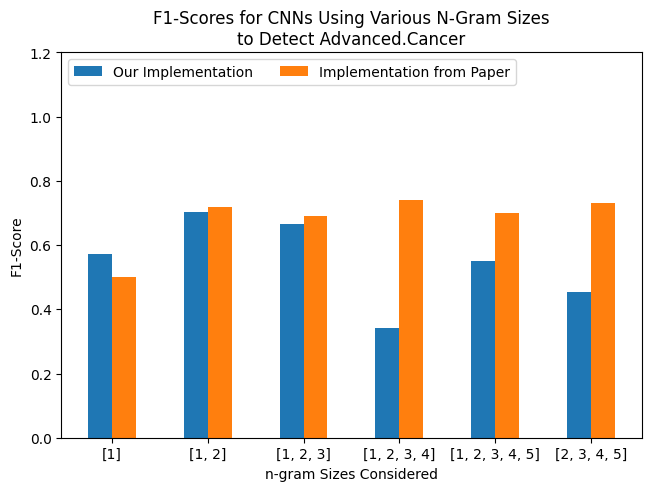

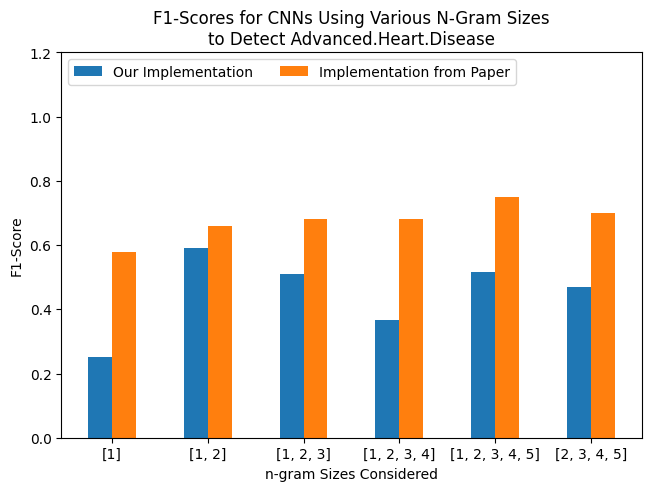

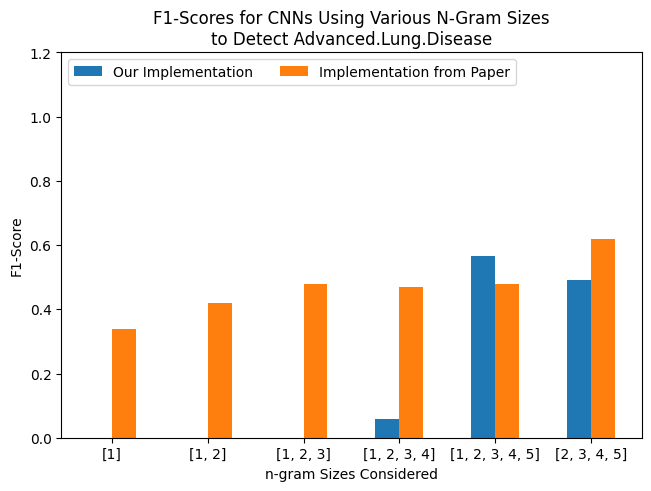

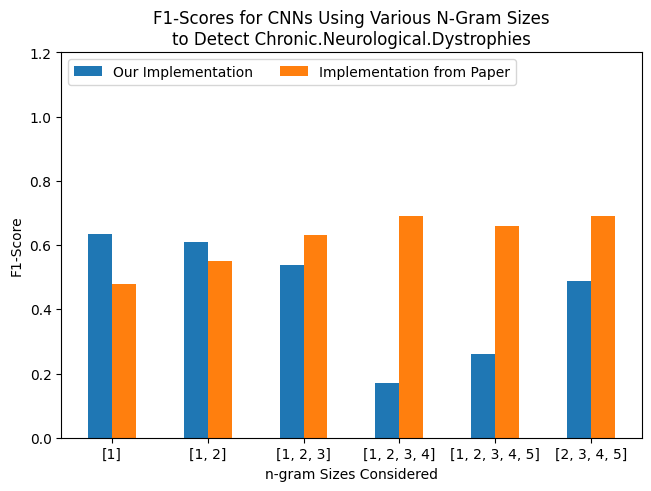

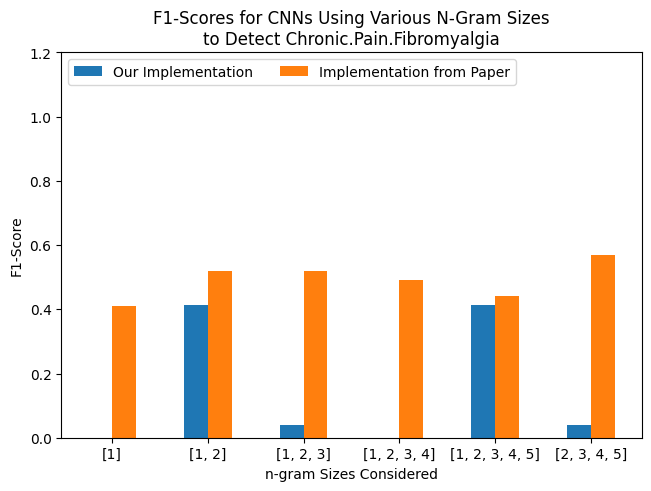

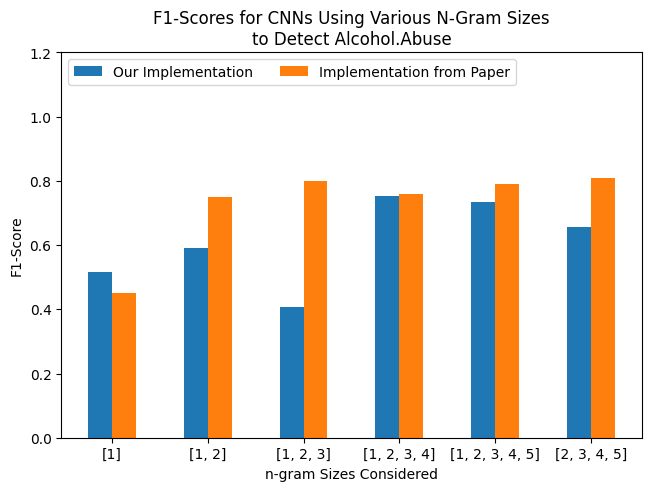

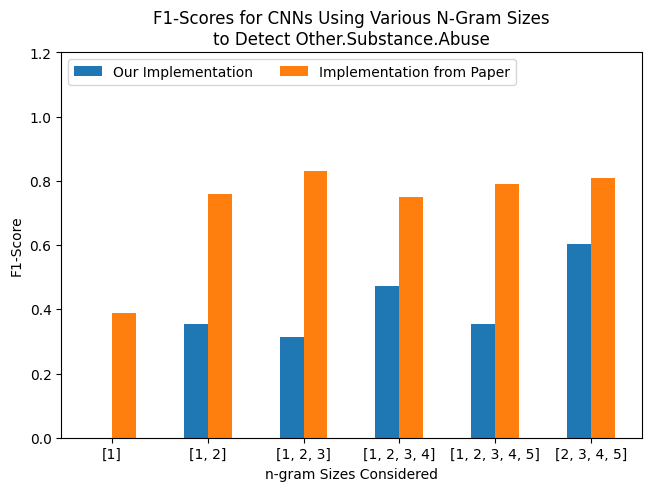

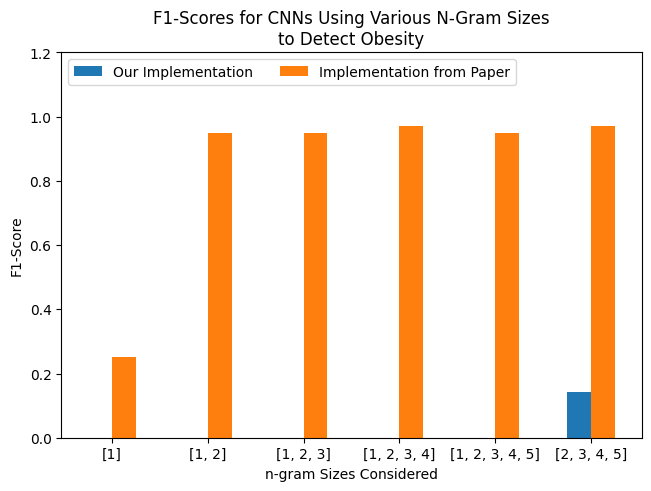

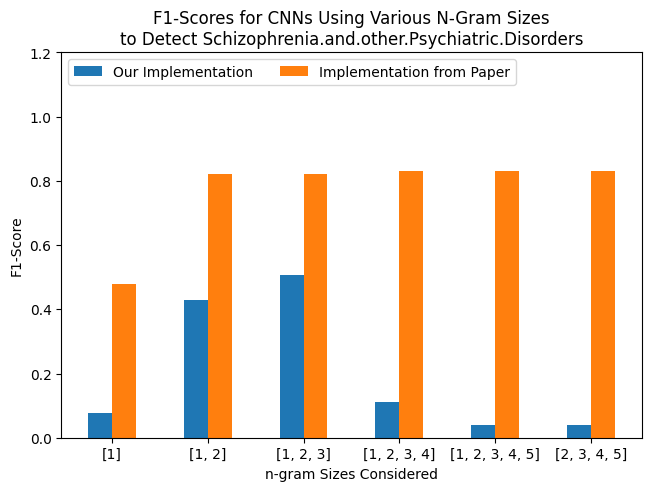

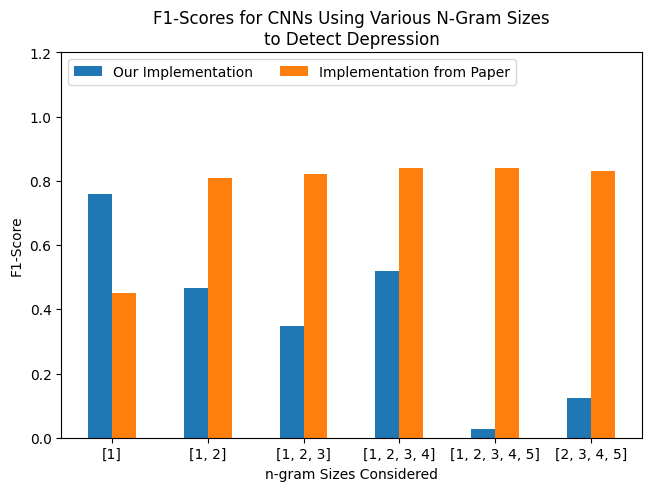

In [ ]:
for condition in results_dict.keys():
    # https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
    labels = results_dict[condition].keys()
    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0.5

    fig, ax = plt.subplots(layout='constrained')

    offset = width * multiplier
    our_f1_scores = [val["f1"] for val in results_dict[condition].values()]
    rects = ax.bar(x + offset, our_f1_scores, width, label = "Our Implementation")
    multiplier += 1

    offset = width * multiplier
    paper_f1_scores = [val["f1"] for val in paper_results[condition].values()]
    rects = ax.bar(x + offset, paper_f1_scores, width, label = "Implementation from Paper")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('F1-Score')
    ax.set_title('F1-Scores for CNNs Using Various N-Gram Sizes\nto Detect ' + condition)
    ax.set_xticks(x + width, labels)
    ax.set_xlabel('n-gram Sizes Considered')
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, 1.2)
    
    plt.show()

Here, we print which CNN (in terms of the n-grams considered) achieved the highest F1-score for each condition investigated. CNNs considering larger and more n-grams seem to have achieved better results.

In [ ]:
for condition in results_dict.keys():
    max_f1 = 0.0
    best_model_size = None
    for n_grams in results_dict[condition].keys():
        if results_dict[condition][n_grams]["f1"] > max_f1:
            max_f1 = results_dict[condition][n_grams]["f1"]
            best_model_size = n_grams
    if best_model_size != None:
        print("For detecting " + condition + ", the best model among those we tried (based on F1-scores) was the one using " + str(best_model_size) + "-gram(s)")
        print("The F1-score for that model was: " + str(results_dict[condition][best_model_size]["f1"]))
    else:
        print("For detecting " + condition + ", all models had an F1-score of 0")
    print()

For detecting Advanced.Cancer, the best model among those we tried (based on F1-scores) was the one using [1, 2]-gram(s)
The F1-score for that model was: 0.7017543859649124

For detecting Advanced.Heart.Disease, the best model among those we tried (based on F1-scores) was the one using [1, 2]-gram(s)
The F1-score for that model was: 0.5897435897435899

For detecting Advanced.Lung.Disease, the best model among those we tried (based on F1-scores) was the one using [1, 2, 3, 4, 5]-gram(s)
The F1-score for that model was: 0.5656565656565657

For detecting Chronic.Neurological.Dystrophies, the best model among those we tried (based on F1-scores) was the one using [1]-gram(s)
The F1-score for that model was: 0.6330935251798561

For detecting Chronic.Pain.Fibromyalgia, the best model among those we tried (based on F1-scores) was the one using [1, 2, 3, 4, 5]-gram(s)
The F1-score for that model was: 0.4146341463414634

For detecting Alcohol.Abuse, the best model among those we tried (based on 

Here, we show bar charts comparing the AUC of our implementation and the paper's authors' implementation of the various CNNs for detecting the ten conditions of interest.

You can see that our implementations and the authors' implementations tend to have similar AUCs. We do not know why this is the case, especially when many of our models have abysmal F1-scores.

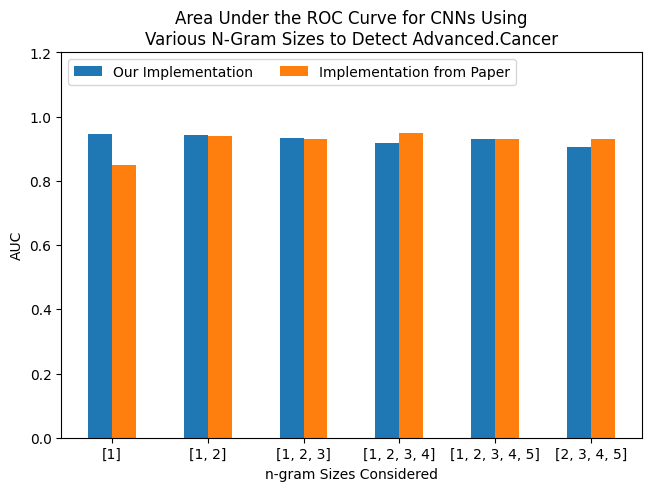

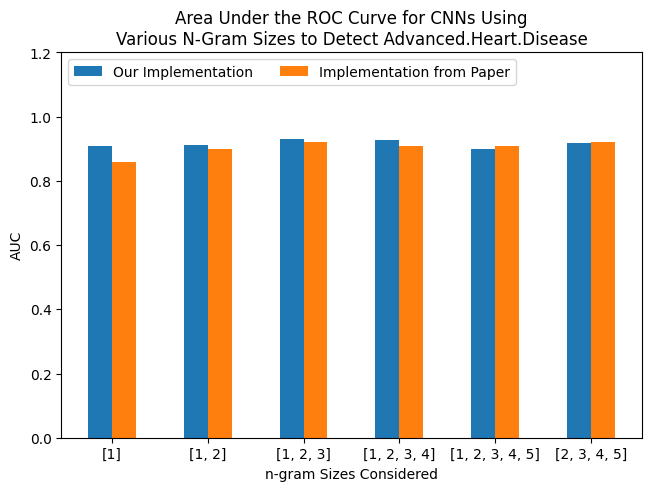

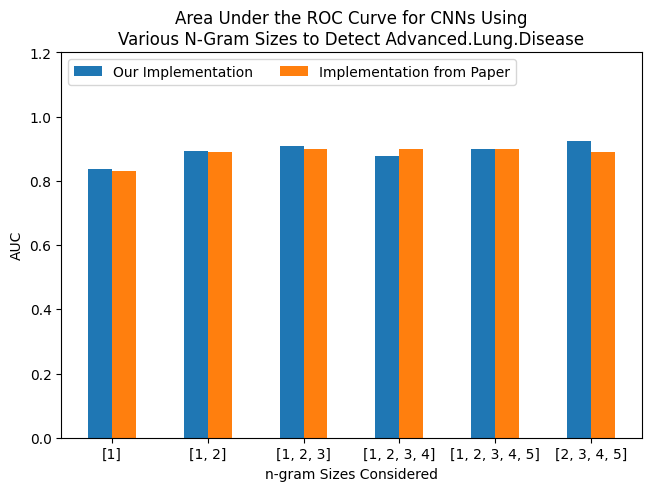

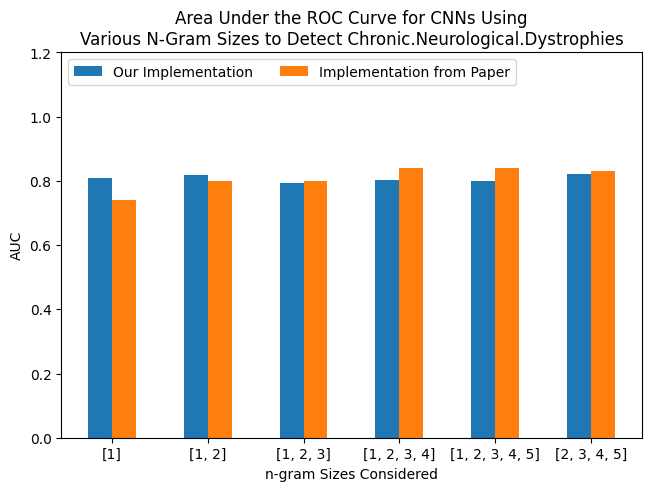

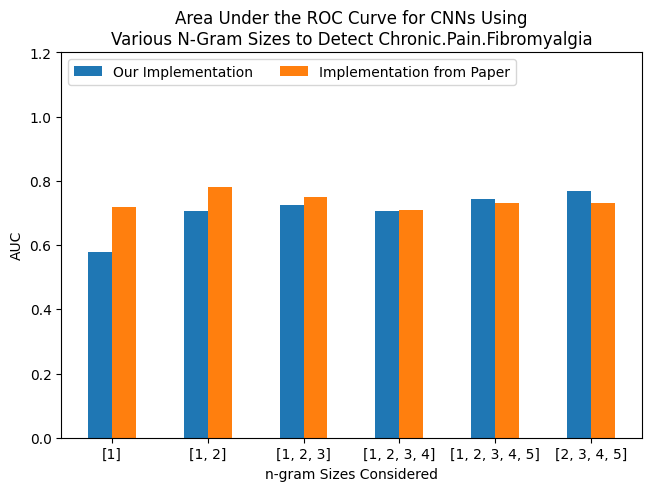

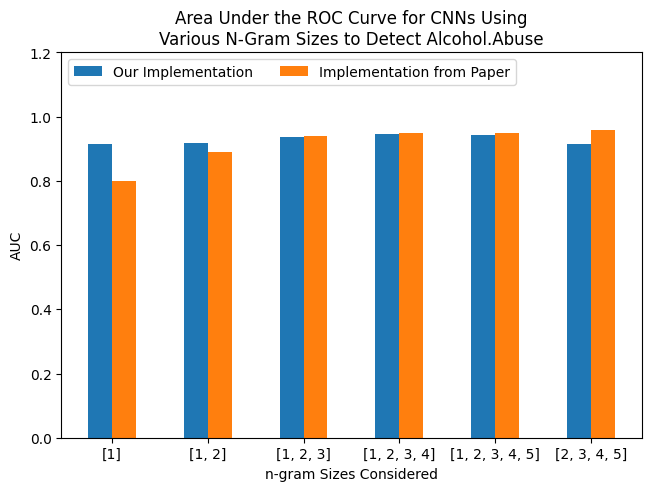

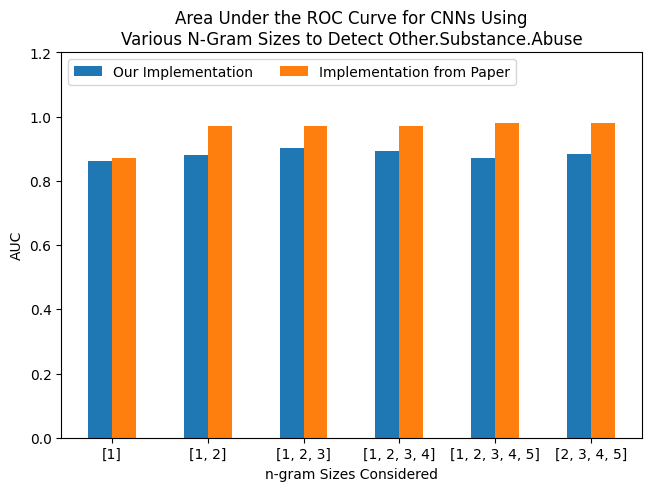

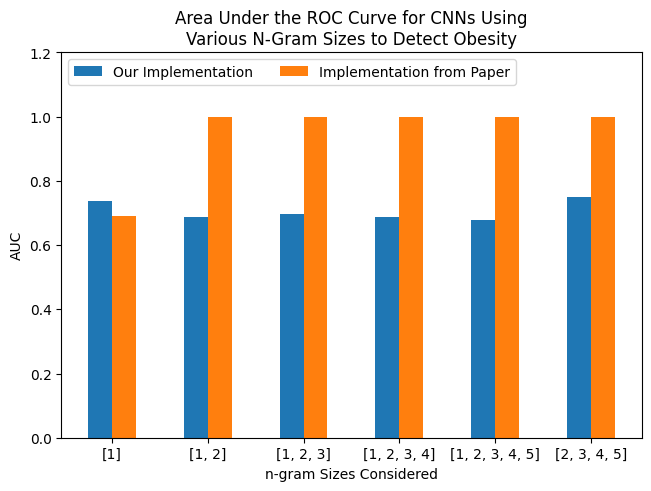

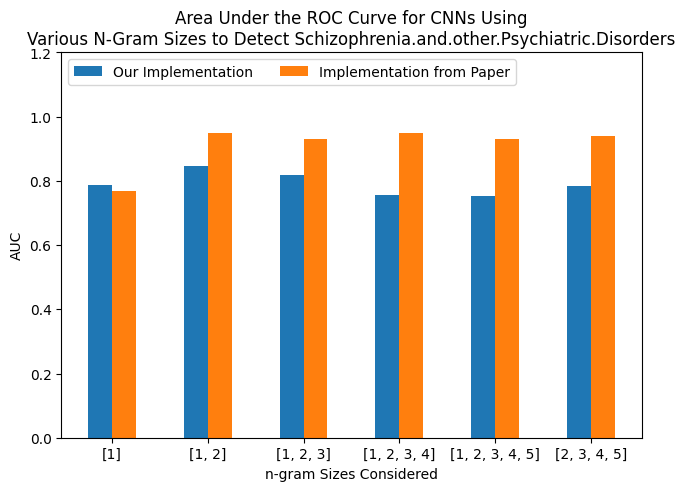

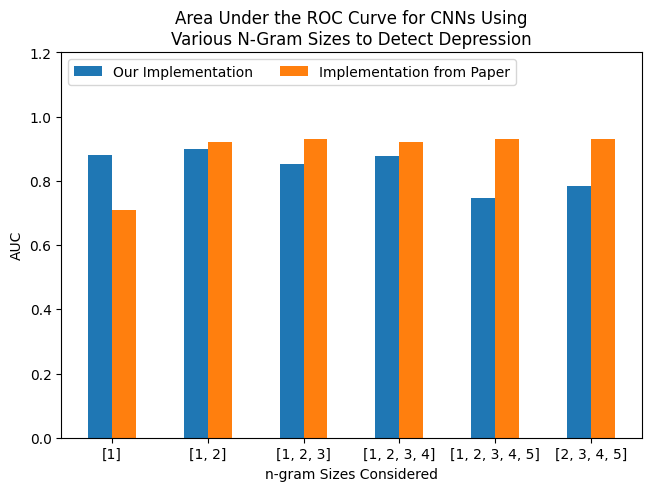

In [ ]:
for condition in results_dict.keys():
    # https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
    labels = results_dict[condition].keys()
    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0.5

    fig, ax = plt.subplots(layout='constrained')

    offset = width * multiplier
    our_aucs = [val["auc"] for val in results_dict[condition].values()]
    rects = ax.bar(x + offset, our_aucs, width, label = "Our Implementation")
    multiplier += 1

    offset = width * multiplier
    paper_aucs = [val["auc"] for val in paper_results[condition].values()]
    rects = ax.bar(x + offset, paper_aucs, width, label = "Implementation from Paper")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('AUC')
    ax.set_title('Area Under the ROC Curve for CNNs Using\nVarious N-Gram Sizes to Detect ' + condition)
    ax.set_xticks(x + width, labels)
    ax.set_xlabel('n-gram Sizes Considered')
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, 1.2)
    
    plt.show()

Here, we print which CNN (in terms of the n-grams considered) achieved the highest AUC for each condition investigated. CNNs considering larger and more n-grams seem to have achieved better results.

In [ ]:
for condition in results_dict.keys():
    max_auc = 0.0
    best_model_size = None
    for n_grams in results_dict[condition].keys():
        if results_dict[condition][n_grams]["auc"] > max_auc:
            max_auc = results_dict[condition][n_grams]["auc"]
            best_model_size = n_grams
    print("For detecting " + condition + ", the best model among those we tried (based on AUC) was the one using " + best_model_size + "-gram(s)")
    print("The AUC for that model was: " + str(results_dict[condition][best_model_size]["auc"]))
    print()

For detecting Advanced.Cancer, the best model among those we tried (based on AUC) was the one using [1]-gram(s)
The AUC for that model was: 0.9455834945196647

For detecting Advanced.Heart.Disease, the best model among those we tried (based on AUC) was the one using [1, 2, 3]-gram(s)
The AUC for that model was: 0.9308529308529307

For detecting Advanced.Lung.Disease, the best model among those we tried (based on AUC) was the one using [2, 3, 4, 5]-gram(s)
The AUC for that model was: 0.925725338491296

For detecting Chronic.Neurological.Dystrophies, the best model among those we tried (based on AUC) was the one using [2, 3, 4, 5]-gram(s)
The AUC for that model was: 0.819891237745098

For detecting Chronic.Pain.Fibromyalgia, the best model among those we tried (based on AUC) was the one using [2, 3, 4, 5]-gram(s)
The AUC for that model was: 0.768348623853211

For detecting Alcohol.Abuse, the best model among those we tried (based on AUC) was the one using [1, 2, 3, 4]-gram(s)
The AUC for

Here, we create a dictionary and store into it the performance metrics of various baseline models.

"Our BoW LR" represents logistic regression models operating on documents represented as bags of words, implemented by us.

"Paper BoW LR" represents logistic regression models operating on documents represented as bags of words, implemented in the paper.

"Our n-gram LR" represents logistic regression models operating on documents represented as bags of n-grams, implemented by us. We made such models considering only unigrams, unigrams and bigrams, unigrams, bigrams, and trigrams, unigrams, bigrams, trigrams, and 4-grams, and unigrams, bigrams, trigrams, 4-grams, and 5-grams, and reported the results of the best model.

"Our n-gram LR" represents logistic regression models operating on documents represented as bags of n-grams, implemented in the paper. The paper's authors made such models considering only unigrams, unigrams and bigrams, unigrams, bigrams, and trigrams, unigrams, bigrams, trigrams, and 4-grams, and unigrams, bigrams, trigrams, 4-grams, and 5-grams, and reported the results of the best model.

"cTAKES Full" refers to the results of the best model out of a logistic regression model, random forest classifier, and naive Bayes classifier operating on documents represented using counts of medical terms extracted using cTAKES. These models were implemented by the authors of the study.

"cTAKES Filtered" refers to the results of the best model out of a logistic regression model, random forest classifier, and naive Bayes classifier operating on documents represented using counts of medical terms extracted using cTAKES which were deemed relevant by medical experts to detecting the condition being looked for. These models were implemented by the authors of the study.

In [ ]:
baseline_results = {}

for condition in results_dict.keys():
    baseline_results[condition] = {}

In [ ]:
baseline_results["Advanced.Cancer"]["Our BoW LR"] = {
            "precision": 0.73,
            "recall": 0.38,
            "f1": 0.5,
            "auc": 0.68
}
baseline_results["Advanced.Cancer"]["Paper BoW LR"] = {
            "precision": 0.44,
            "recall": 0.77,
            "f1": 0.56,
            "auc": 0.9
}
baseline_results["Advanced.Cancer"]["Our n-gram LR"] = {
            "precision": 0.77,
            "recall": 0.45,
            "f1": 0.57,
            "auc": 0.71
}
baseline_results["Advanced.Cancer"]["Paper n-gram LR"] = {
            "precision": 0.41,
            "recall": 0.55,
            "f1": 0.47,
            "auc": 0.88
}
baseline_results["Advanced.Cancer"]["cTAKES Full"] = {
            "precision": 0.80,
            "recall": 0.65,
            "f1": 0.71,
            "auc": 0.94
}
baseline_results["Advanced.Cancer"]["cTAKES Filtered"] = {
            "precision": 0.85,
            "recall": 0.55,
            "f1": 0.67,
            "auc": 0.92
}

baseline_results["Advanced.Heart.Disease"]["Our BoW LR"] = {
            "precision": 0.58,
            "recall": 0.45,
            "f1": 0.5,
            "auc": 0.68
}
baseline_results["Advanced.Heart.Disease"]["Paper BoW LR"] = {
            "precision": 0.7,
            "recall": 0.32,
            "f1": 0.44,
            "auc": 0.85
}
baseline_results["Advanced.Heart.Disease"]["Our n-gram LR"] = {
            "precision": 0.76,
            "recall": 0.46,
            "f1": 0.58,
            "auc": 0.72
}
baseline_results["Advanced.Heart.Disease"]["Paper n-gram LR"] = {
            "precision": 0.78,
            "recall": 0.42,
            "f1": 0.55,
            "auc": 0.85
}
baseline_results["Advanced.Heart.Disease"]["cTAKES Full"] = {
            "precision": 0.71,
            "recall": 0.49,
            "f1": 0.58,
            "auc": 0.88
}
baseline_results["Advanced.Heart.Disease"]["cTAKES Filtered"] = {
            "precision": 0.73,
            "recall": 0.59,
            "f1": 0.65,
            "auc": 0.89
}

baseline_results["Advanced.Lung.Disease"]["Our BoW LR"] = {
            "precision": 0.67,
            "recall": 0.34,
            "f1": 0.45,
            "auc": 0.66
}
baseline_results["Advanced.Lung.Disease"]["Paper BoW LR"] = {
            "precision": 0.21,
            "recall": 0.29,
            "f1": 0.24,
            "auc": 0.76
}
baseline_results["Advanced.Lung.Disease"]["Our n-gram LR"] = {
            "precision": 0.6,
            "recall": 0.2,
            "f1": 0.3,
            "auc": 0.59
}
baseline_results["Advanced.Lung.Disease"]["Paper n-gram LR"] = {
            "precision": 0.27,
            "recall": 0.39,
            "f1": 0.32,
            "auc": 0.79
}
baseline_results["Advanced.Lung.Disease"]["cTAKES Full"] = {
            "precision": 0.67,
            "recall": 0.29,
            "f1": 0.4,
            "auc": 0.81
}
baseline_results["Advanced.Lung.Disease"]["cTAKES Filtered"] = {
            "precision": 0.43,
            "recall": 0.36,
            "f1": 0.39,
            "auc": 0.87
}

baseline_results["Chronic.Neurological.Dystrophies"]["Our BoW LR"] = {
            "precision": 0.63,
            "recall": 0.41,
            "f1": 0.5,
            "auc": 0.67
}
baseline_results["Chronic.Neurological.Dystrophies"]["Paper BoW LR"] = {
            "precision": 0.47,
            "recall": 0.46,
            "f1": 0.46,
            "auc": 0.72
}
baseline_results["Chronic.Neurological.Dystrophies"]["Our n-gram LR"] = {
            "precision": 0.74,
            "recall": 0.35,
            "f1": 0.49,
            "auc": 0.67
}
baseline_results["Chronic.Neurological.Dystrophies"]["Paper n-gram LR"] = {
            "precision": 0.49,
            "recall": 0.54,
            "f1": 0.51,
            "auc": 0.71
}
baseline_results["Chronic.Neurological.Dystrophies"]["cTAKES Full"] = {
            "precision": 0.75,
            "recall": 0.55,
            "f1": 0.64,
            "auc": 0.87
}
baseline_results["Chronic.Neurological.Dystrophies"]["cTAKES Filtered"] = {
            "precision": 0.8,
            "recall": 0.62,
            "f1": 0.7,
            "auc": 0.86
}

baseline_results["Chronic.Pain.Fibromyalgia"]["Our BoW LR"] = {
            "precision": 0.45,
            "recall": 0.27,
            "f1": 0.34,
            "auc": 0.6
}
baseline_results["Chronic.Pain.Fibromyalgia"]["Paper BoW LR"] = {
            "precision": 0.33,
            "recall": 0.54,
            "f1": 0.41,
            "auc": 0.68
}
baseline_results["Chronic.Pain.Fibromyalgia"]["Our n-gram LR"] = {
            "precision": 0.56,
            "recall": 0.35,
            "f1": 0.43,
            "auc": 0.65
}
baseline_results["Chronic.Pain.Fibromyalgia"]["Paper n-gram LR"] = {
            "precision": 0.42,
            "recall": 0.46,
            "f1": 0.44,
            "auc": 0.67
}
baseline_results["Chronic.Pain.Fibromyalgia"]["cTAKES Full"] = {
            "precision": 0.66,
            "recall": 0.41,
            "f1": 0.51,
            "auc": 0.78
}
baseline_results["Chronic.Pain.Fibromyalgia"]["cTAKES Filtered"] = {
            "precision": 0.66,
            "recall": 0.48,
            "f1": 0.56,
            "auc": 0.85
}

baseline_results["Alcohol.Abuse"]["Our BoW LR"] = {
            "precision": 0.85,
            "recall": 0.39,
            "f1": 0.54,
            "auc": 0.69
}
baseline_results["Alcohol.Abuse"]["Paper BoW LR"] = {
            "precision": 1.0,
            "recall": 0.5,
            "f1": 0.67,
            "auc": 0.89
}
baseline_results["Alcohol.Abuse"]["Our n-gram LR"] = {
            "precision": 0.81,
            "recall": 0.35,
            "f1": 0.49,
            "auc": 0.67
}
baseline_results["Alcohol.Abuse"]["Paper n-gram LR"] = {
            "precision": 0.55,
            "recall": 0.64,
            "f1": 0.59,
            "auc": 0.88
}
baseline_results["Alcohol.Abuse"]["cTAKES Full"] = {
            "precision": 0.88,
            "recall": 0.79,
            "f1": 0.83,
            "auc": 0.95
}
baseline_results["Alcohol.Abuse"]["cTAKES Filtered"] = {
            "precision": 0.91,
            "recall": 0.75,
            "f1": 0.82,
            "auc": 0.96
}

baseline_results["Other.Substance.Abuse"]["Our BoW LR"] = {
            "precision": 0.69,
            "recall": 0.53,
            "f1": 0.60,
            "auc": 0.75
}
baseline_results["Other.Substance.Abuse"]["Paper BoW LR"] = {
            "precision": 0.62,
            "recall": 0.5,
            "f1": 0.56,
            "auc": 0.9
}
baseline_results["Other.Substance.Abuse"]["Our n-gram LR"] = {
            "precision": 0.77,
            "recall": 0.4,
            "f1": 0.53,
            "auc": 0.7
}
baseline_results["Other.Substance.Abuse"]["Paper n-gram LR"] = {
            "precision": 0.83,
            "recall": 0.33,
            "f1": 0.48,
            "auc": 0.86
}
baseline_results["Other.Substance.Abuse"]["cTAKES Full"] = {
            "precision": 0.93,
            "recall": 0.47,
            "f1": 0.62,
            "auc": 0.97
}
baseline_results["Other.Substance.Abuse"]["cTAKES Filtered"] = {
            "precision": 0.87,
            "recall": 0.87,
            "f1": 0.75,
            "auc": 0.97
}

baseline_results["Obesity"]["Our BoW LR"] = {
            "precision": 0.64,
            "recall": 0.33,
            "f1": 0.44,
            "auc": 0.66
}
baseline_results["Obesity"]["Paper BoW LR"] = {
            "precision": 0.27,
            "recall": 0.35,
            "f1": 0.3,
            "auc": 0.72
}
baseline_results["Obesity"]["Our n-gram LR"] = {
            "precision": 0.5,
            "recall": 0.05,
            "f1": 0.09,
            "auc": 0.52
}
baseline_results["Obesity"]["Paper n-gram LR"] = {
            "precision": 0.44,
            "recall": 0.2,
            "f1": 0.28,
            "auc": 0.71
}
baseline_results["Obesity"]["cTAKES Full"] = {
            "precision": 0.64,
            "recall": 0.8,
            "f1": 0.71,
            "auc": 0.99
}
baseline_results["Obesity"]["cTAKES Filtered"] = {
            "precision": 0.62,
            "recall": 0.75,
            "f1": 0.68,
            "auc": 0.98
}

baseline_results["Schizophrenia.and.other.Psychiatric.Disorders"]["Our BoW LR"] = {
            "precision": 0.67,
            "recall": 0.42,
            "f1": 0.51,
            "auc": 0.69
}
baseline_results["Schizophrenia.and.other.Psychiatric.Disorders"]["Paper BoW LR"] = {
            "precision": 0.47,
            "recall": 0.53,
            "f1": 0.5,
            "auc": 0.77
}
baseline_results["Schizophrenia.and.other.Psychiatric.Disorders"]["Our n-gram LR"] = {
            "precision": 0.94,
            "recall": 0.33,
            "f1": 0.48,
            "auc": 0.66
}
baseline_results["Schizophrenia.and.other.Psychiatric.Disorders"]["Paper n-gram LR"] = {
            "precision": 0.53,
            "recall": 0.39,
            "f1": 0.45,
            "auc": 0.76
}
baseline_results["Schizophrenia.and.other.Psychiatric.Disorders"]["cTAKES Full"] = {
            "precision": 0.74,
            "recall": 0.63,
            "f1": 0.68,
            "auc": 0.88
}
baseline_results["Schizophrenia.and.other.Psychiatric.Disorders"]["cTAKES Filtered"] = {
            "precision": 0.81,
            "recall": 0.64,
            "f1": 0.72,
            "auc": 0.93
}

baseline_results["Depression"]["Our BoW LR"] = {
            "precision": 0.6,
            "recall": 0.52,
            "f1": 0.56,
            "auc": 0.69
}
baseline_results["Depression"]["Paper BoW LR"] = {
            "precision": 0.51,
            "recall": 0.67,
            "f1": 0.58,
            "auc": 0.77
}
baseline_results["Depression"]["Our n-gram LR"] = {
            "precision": 0.64,
            "recall": 0.36,
            "f1": 0.46,
            "auc": 0.64
}
baseline_results["Depression"]["Paper n-gram LR"] = {
            "precision": 0.51,
            "recall": 0.73,
            "f1": 0.6,
            "auc": 0.78
}
baseline_results["Depression"]["cTAKES Full"] = {
            "precision": 0.81,
            "recall": 0.72,
            "f1": 0.76,
            "auc": 0.94
}
baseline_results["Depression"]["cTAKES Filtered"] = {
            "precision": 0.79,
            "recall": 0.77,
            "f1": 0.78,
            "auc": 0.91
}

Here, we show bar charts comparing the F1-scores of our implementation of the CNNs proposed by the paper and various baseline models, for the ten conditions of interest.

You can see that our implementations often have lower F1-scores than the baseline models, and sometimes fail totally while the baseline models do not. We therefore lack evidence to support our claim that this CNN architecture is better than past methods, but cannot conclusively disprove it, as we are not sure that we have correctly implemented the CNNs described in the paper.

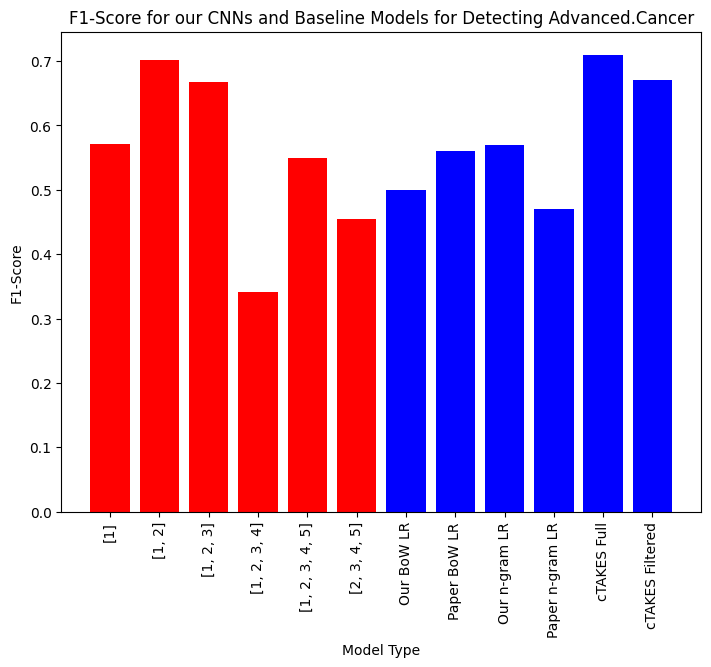

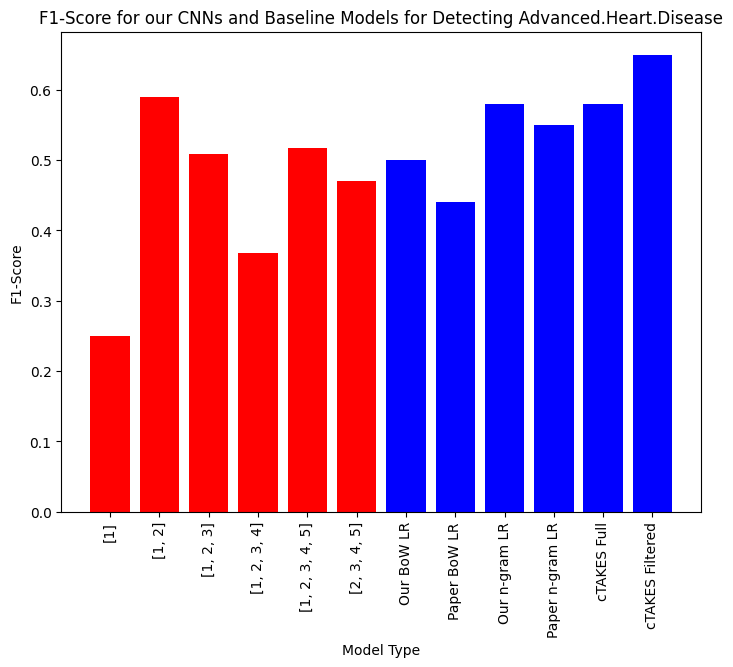

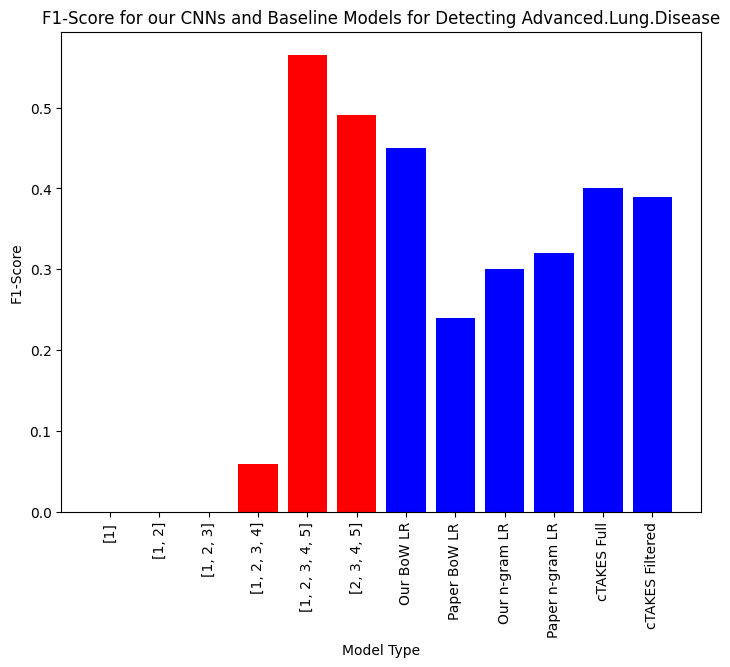

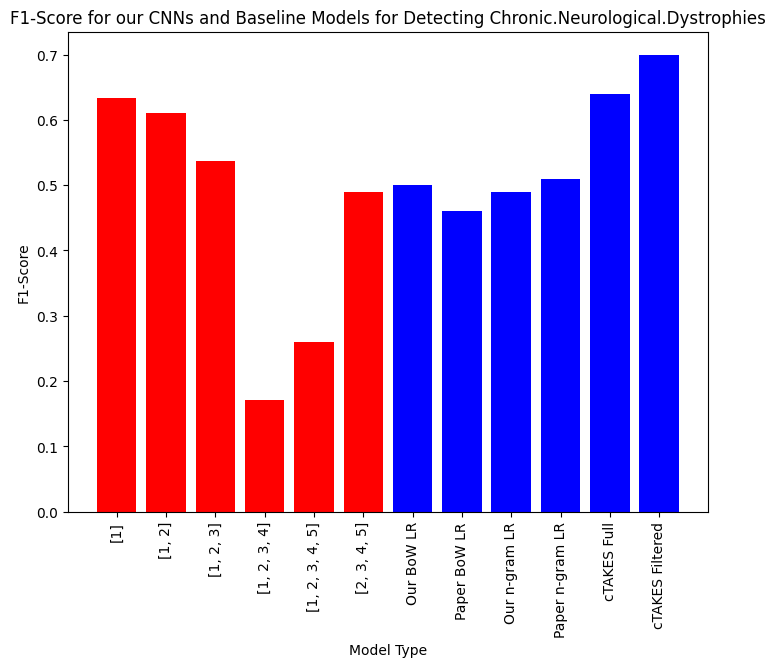

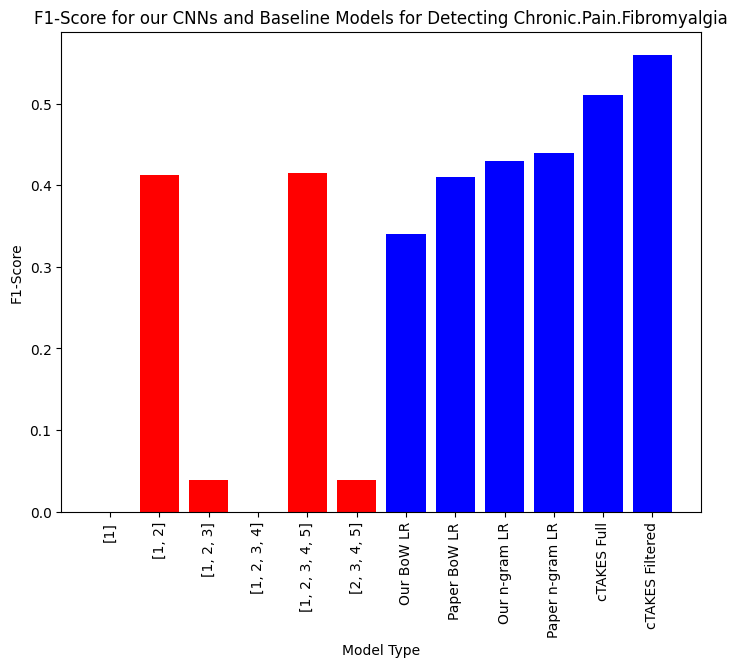

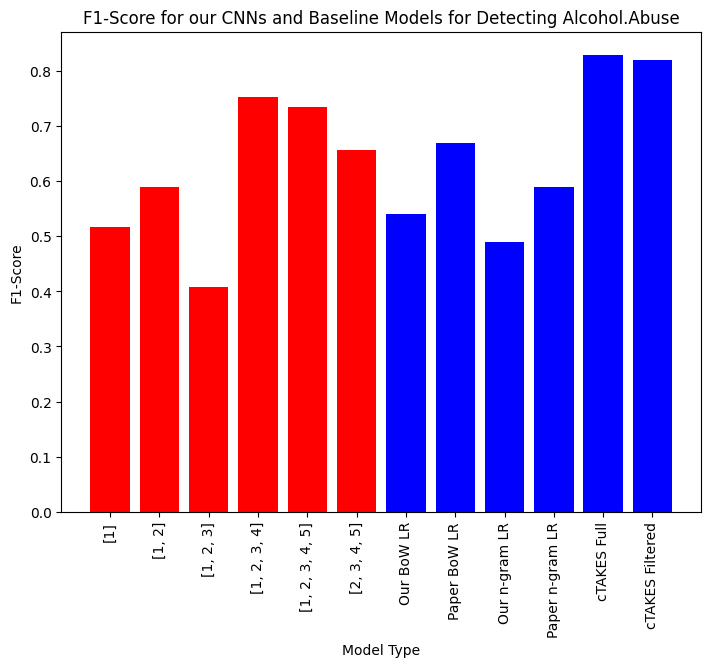

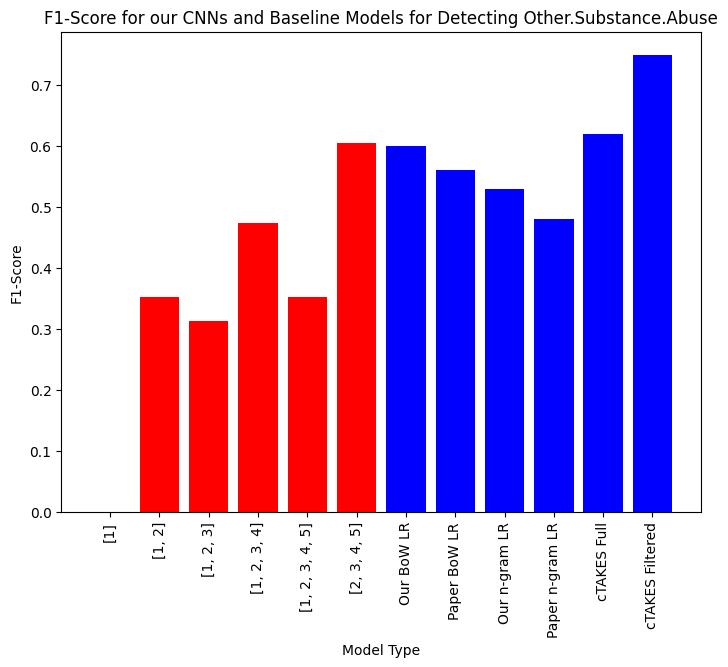

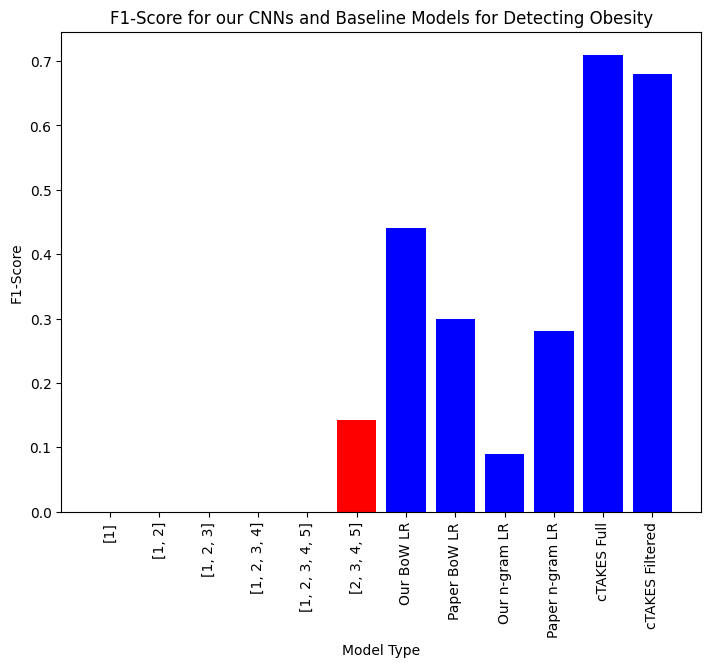

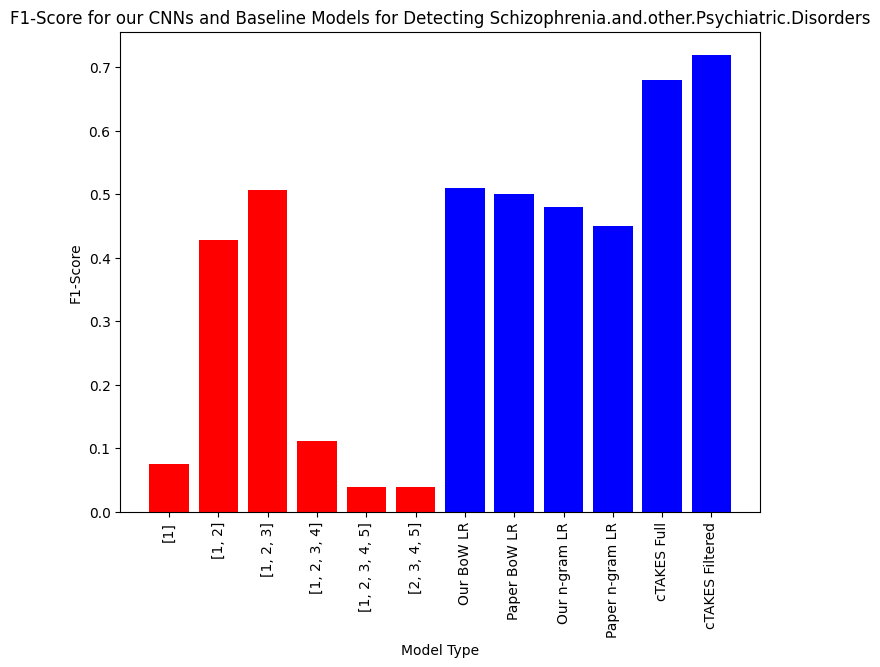

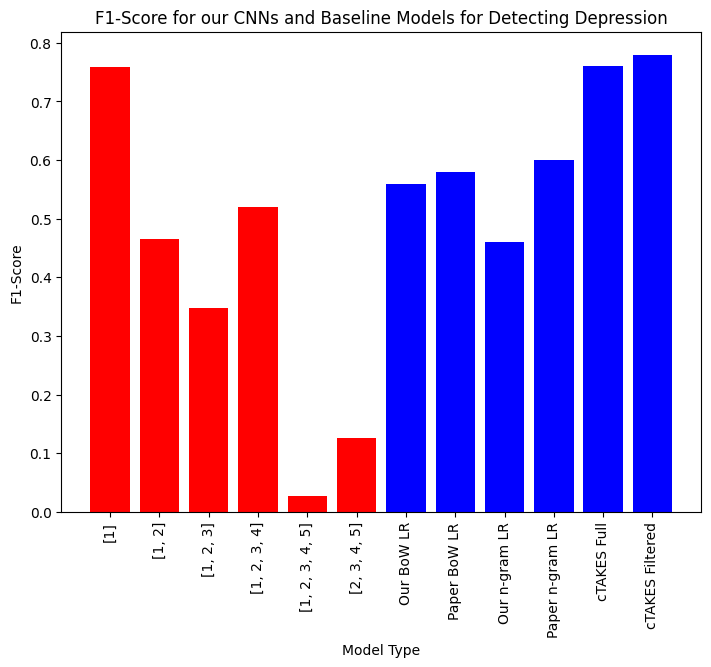

In [ ]:
for condition in results_dict.keys():
    # https://stackoverflow.com/a/7946825
    labels = list(results_dict[condition].keys()) + list(baseline_results[condition].keys())
    f1_scores = [val["f1"] for val in (list(results_dict[condition].values()) + list(baseline_results[condition].values()))]

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.bar(labels, f1_scores, color = (['red'] * 6) + (['blue'] * 6))
    # https://stackoverflow.com/a/52724092
    y_pos = range(len(labels))
    ax.set_xticks(y_pos, labels, rotation=90)

    ax.set_ylabel('F1-Score')
    ax.set_title('F1-Score for our CNNs and Baseline Models for Detecting ' + condition)
    ax.set_xlabel('Model Type')

    plt.show()

Here, we show bar charts comparing the AUCs of our implementation of the CNNs proposed by the paper and various baseline models, for the ten conditions of interest.

You can see that our implementations' AUCs are not always higher than those of the baseline models.

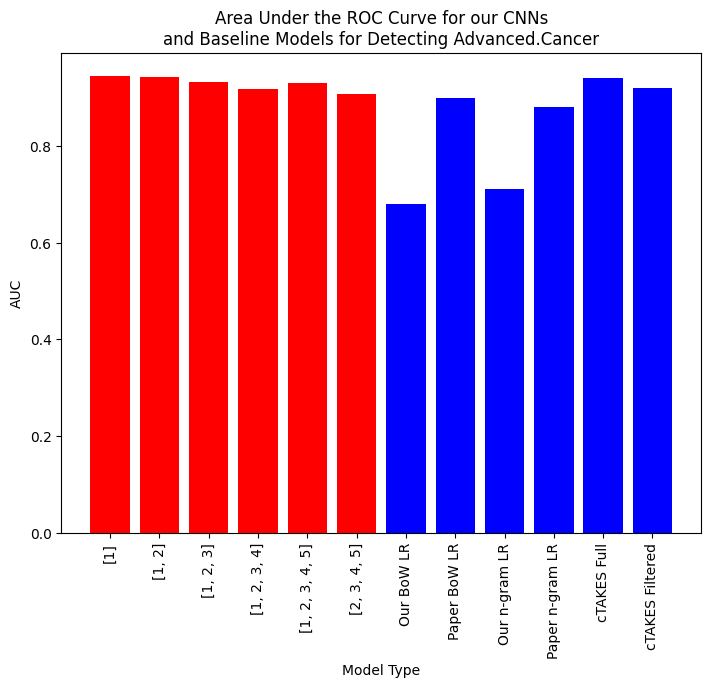

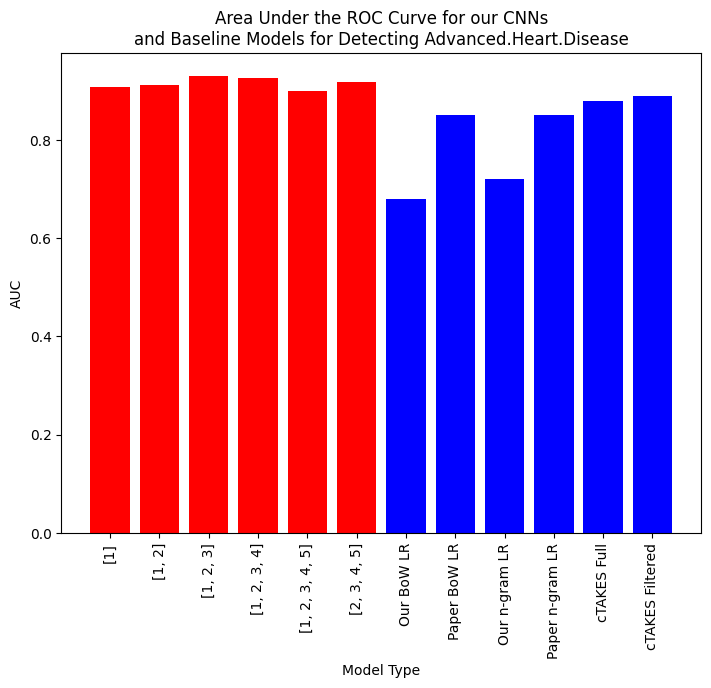

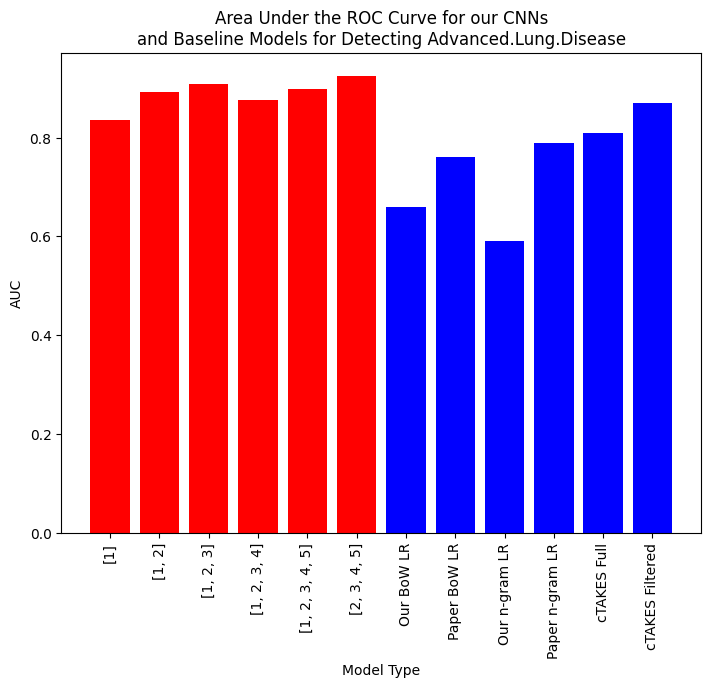

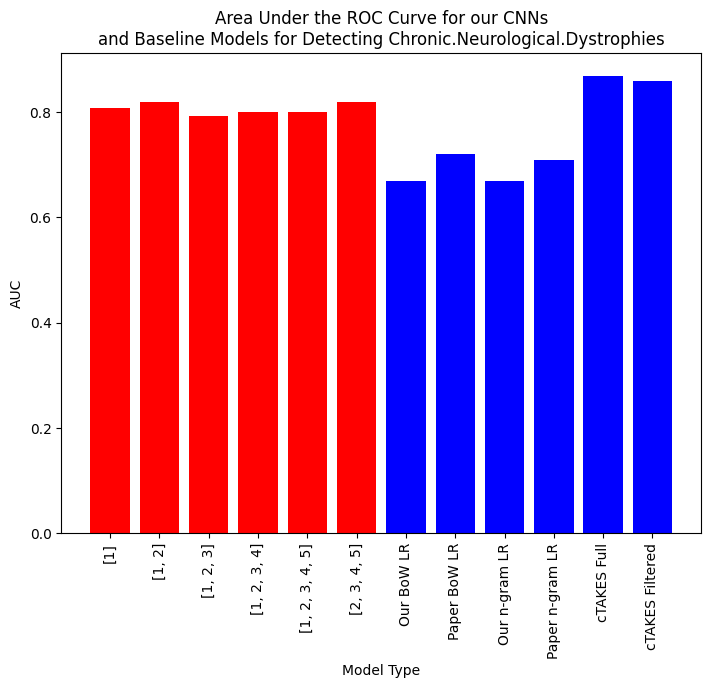

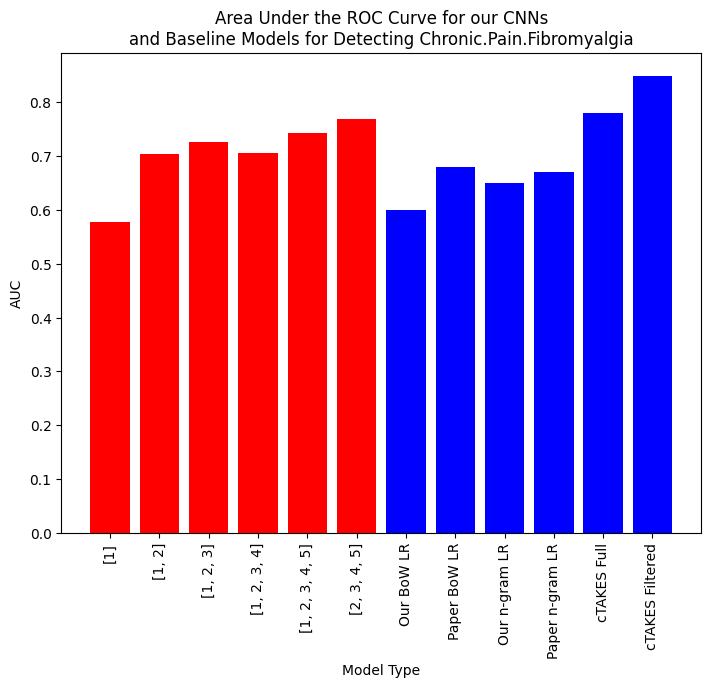

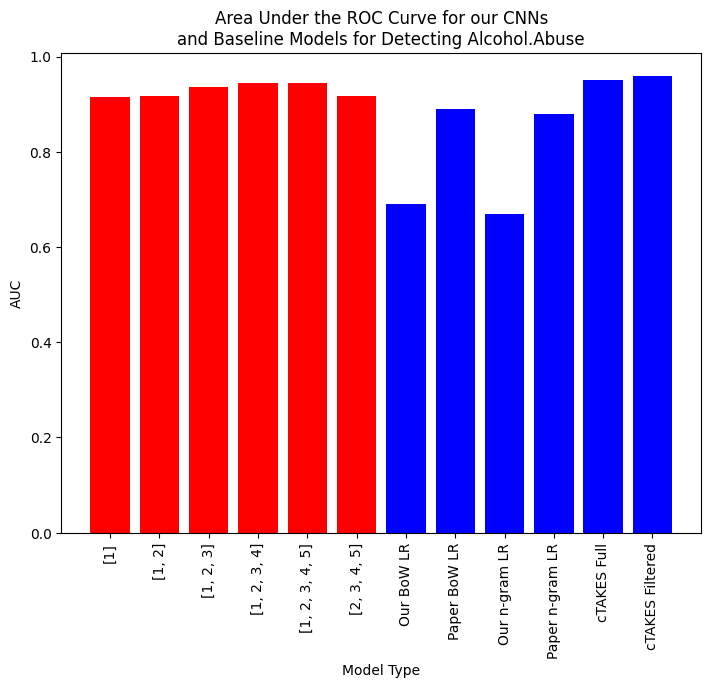

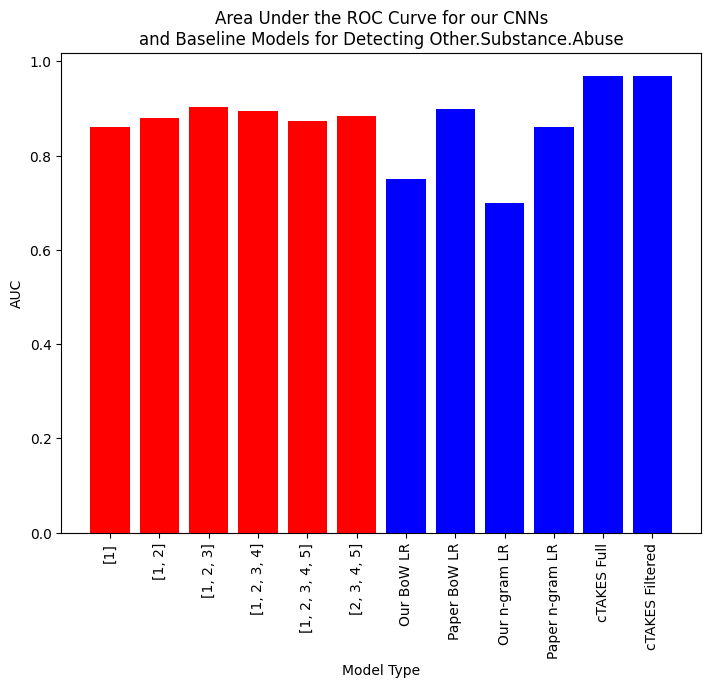

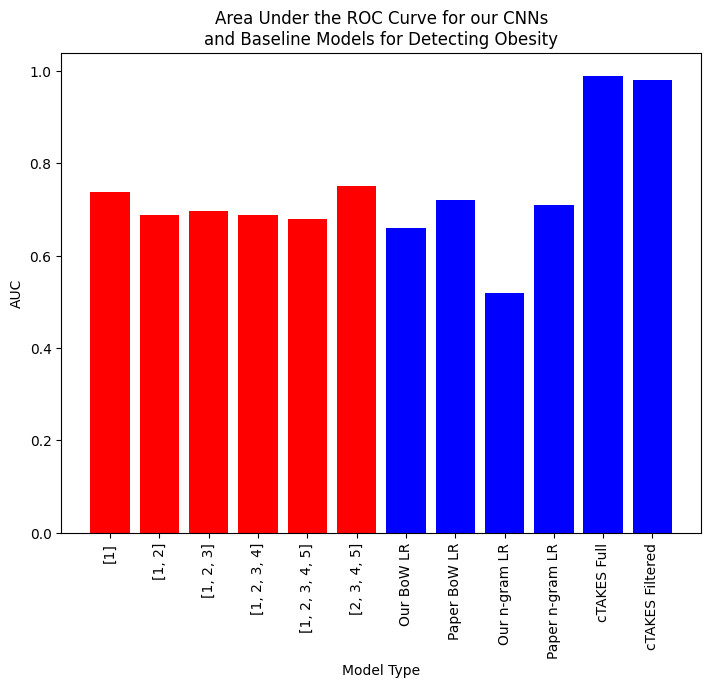

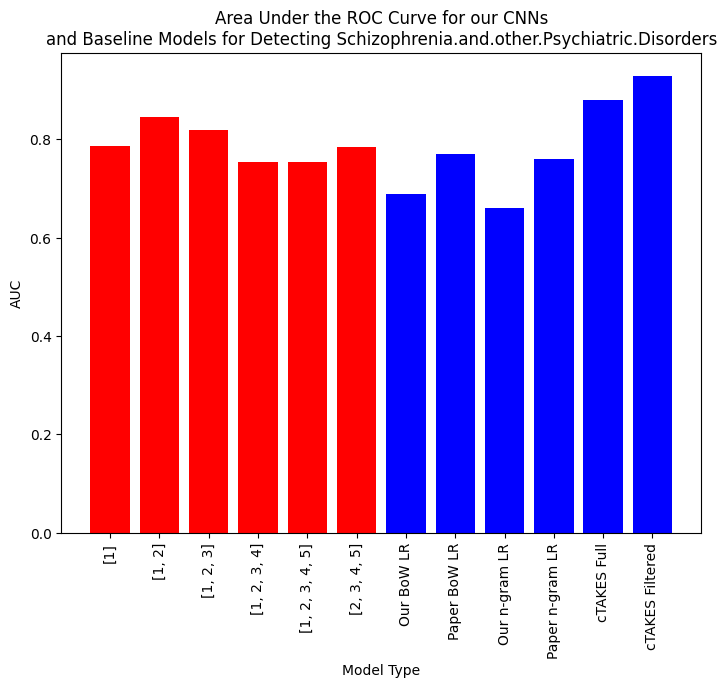

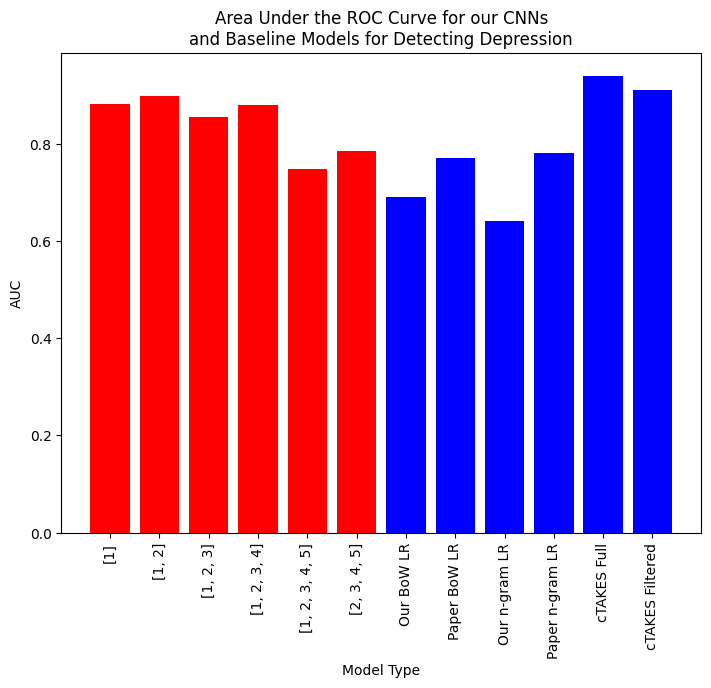

In [ ]:
for condition in results_dict.keys():
    # https://stackoverflow.com/a/7946825
    labels = list(results_dict[condition].keys()) + list(baseline_results[condition].keys())
    aucs = [val["auc"] for val in (list(results_dict[condition].values()) + list(baseline_results[condition].values()))]

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.bar(labels, aucs, color = (['red'] * 6) + (['blue'] * 6))
    # https://stackoverflow.com/a/52724092
    y_pos = range(len(labels))
    ax.set_xticks(y_pos, labels, rotation=90)

    ax.set_ylabel('AUC')
    ax.set_title('Area Under the ROC Curve for our CNNs\nand Baseline Models for Detecting ' + condition)
    ax.set_xlabel('Model Type')
    plt.show()

Here, we load data describing the results of our first ablation, in which we removed the ReLU applied to the results of our convolutional layer (because a global max pooling operation is applied right afterwards, which one might think would make the ReLU pointless).

In [ ]:
with open("no_ReLU_results.json", 'r') as f:
    no_relu_results = json.load(f)
print(json.dumps(no_relu_results, indent = 4))

{
    "Advanced.Cancer": {
        "[1]": {
            "training time": 14.53543758392334,
            "predicted percent positive": 0.018656716417910446,
            "actual percent positive": 0.12313432835820895,
            "accuracy": 0.8880597014925373,
            "precision": 0.8,
            "recall": 0.12121212121212122,
            "f1": 0.2105263157894737,
            "auc": 0.9128304319793682
        },
        "[1, 2]": {
            "training time": 20.361693859100342,
            "predicted percent positive": 0.10074626865671642,
            "actual percent positive": 0.12313432835820895,
            "accuracy": 0.9402985074626866,
            "precision": 0.8148148148148148,
            "recall": 0.6666666666666666,
            "f1": 0.7333333333333333,
            "auc": 0.9519664732430689
        },
        "[1, 2, 3]": {
            "training time": 55.84630584716797,
            "predicted percent positive": 0.08582089552238806,
            "actual percent positive

Here, we show bar charts comparing the F1-scores of our implementation of the CNNs proposed by the paper with the ReLU to the F1-scores of our implementation of the CNNs proposed by the paper without the ReLU, for the ten conditions of interest.

You can see that removing ReLU sometimes increases F1-score and sometimes decreases it.

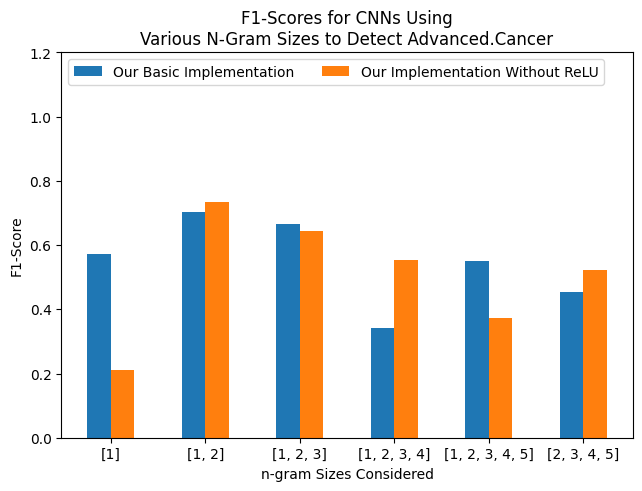

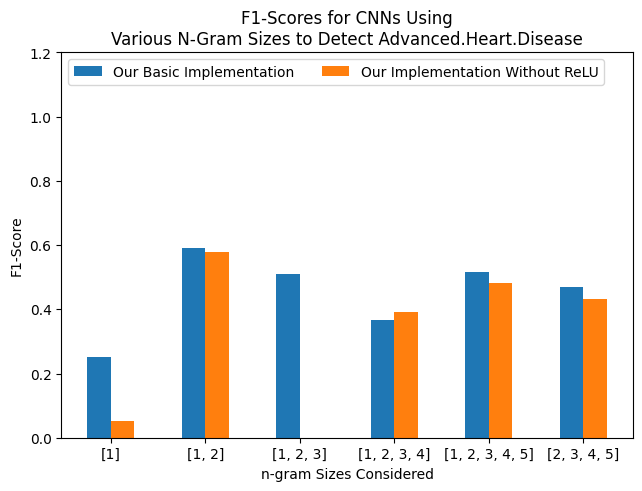

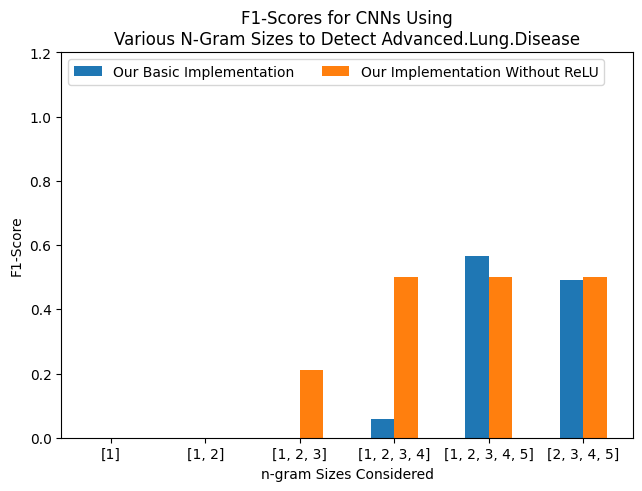

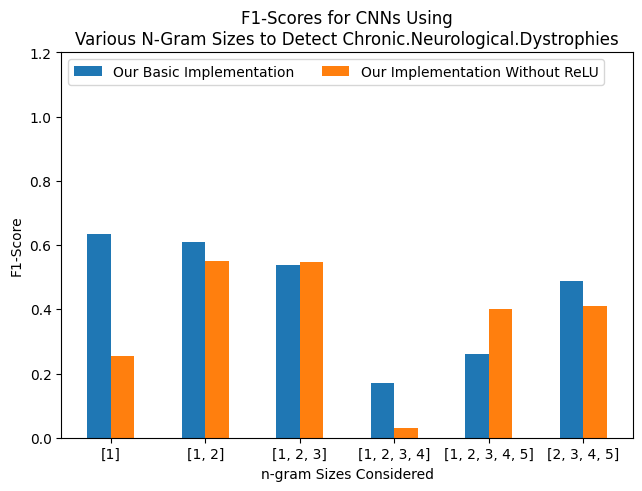

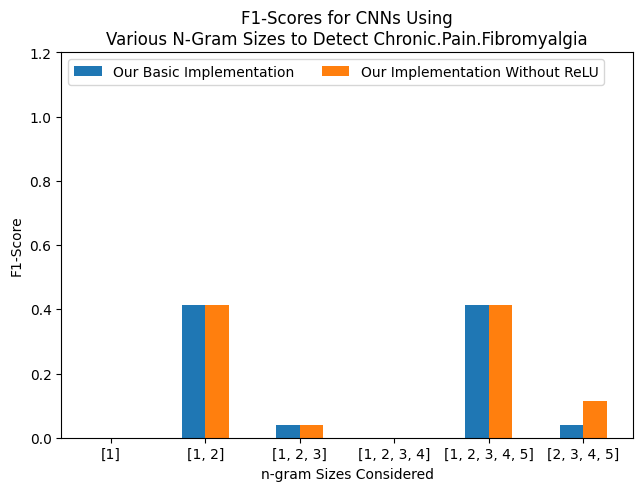

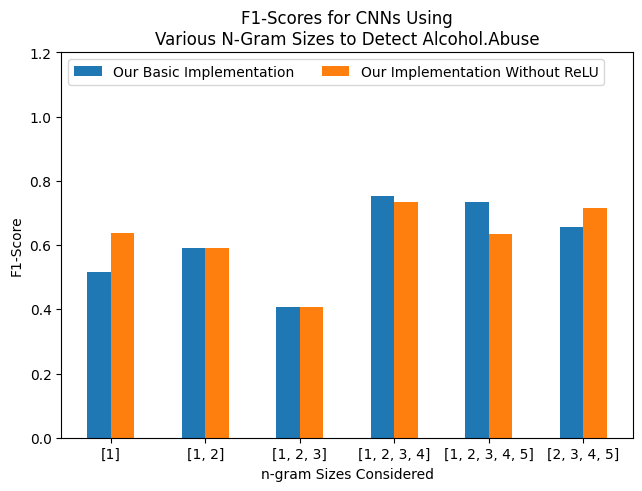

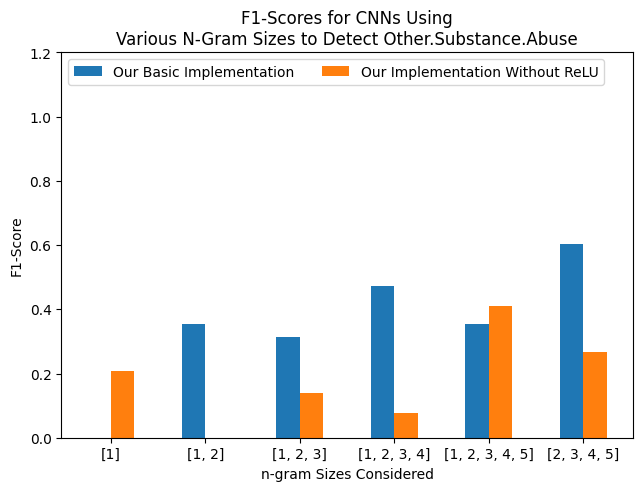

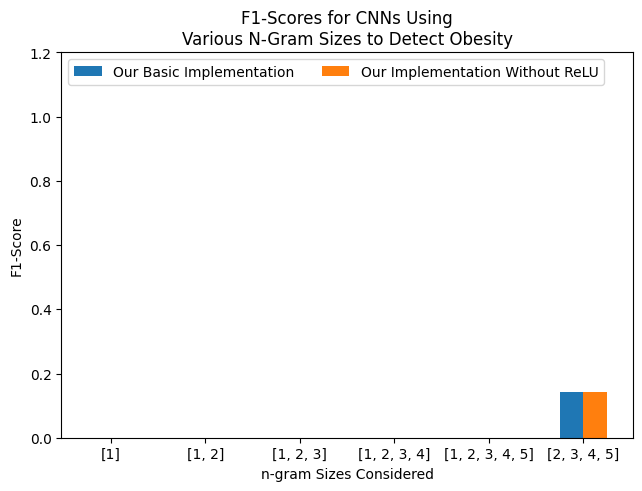

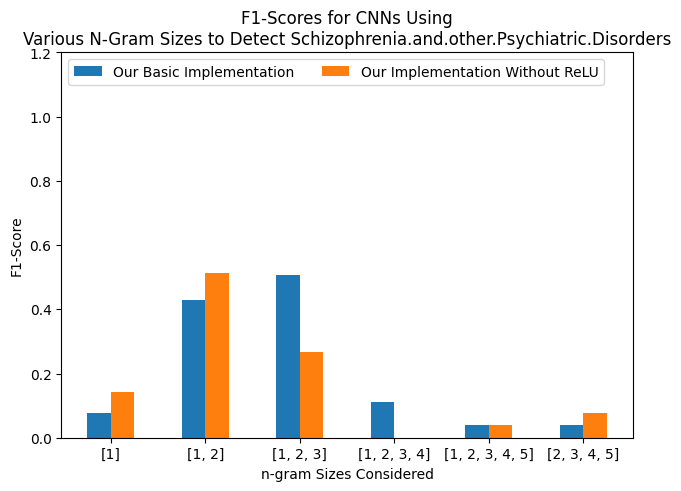

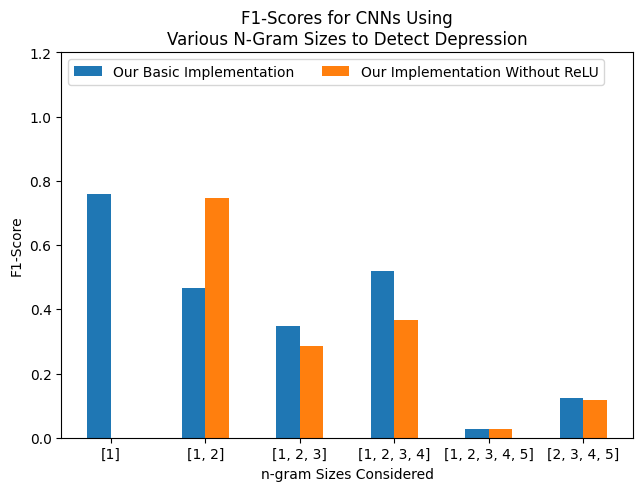

In [ ]:
for condition in results_dict.keys():
    # https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
    labels = results_dict[condition].keys()
    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0.5

    fig, ax = plt.subplots(layout='constrained')

    offset = width * multiplier
    our_f1s = [val["f1"] for val in results_dict[condition].values()]
    rects = ax.bar(x + offset, our_f1s, width, label = "Our Basic Implementation")
    multiplier += 1

    offset = width * multiplier
    no_relu_f1s = [val["f1"] for val in no_relu_results[condition].values()]
    rects = ax.bar(x + offset, no_relu_f1s, width, label = "Our Implementation Without ReLU")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('F1-Score')
    ax.set_title('F1-Scores for CNNs Using\nVarious N-Gram Sizes to Detect ' + condition)
    ax.set_xticks(x + width, labels)
    ax.set_xlabel('n-gram Sizes Considered')
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, 1.2)
    
    plt.show()

Here, we show bar charts comparing the AUCs of our implementation of the CNNs proposed by the paper with the ReLU to the AUCs of our implementation of the CNNs proposed by the paper without the ReLU, for the ten conditions of interest.

You can see that removing ReLU usually increases AUC and makes it more consistent between the different CNNs for each condition. We are not sure what this result and the previous one indicate.

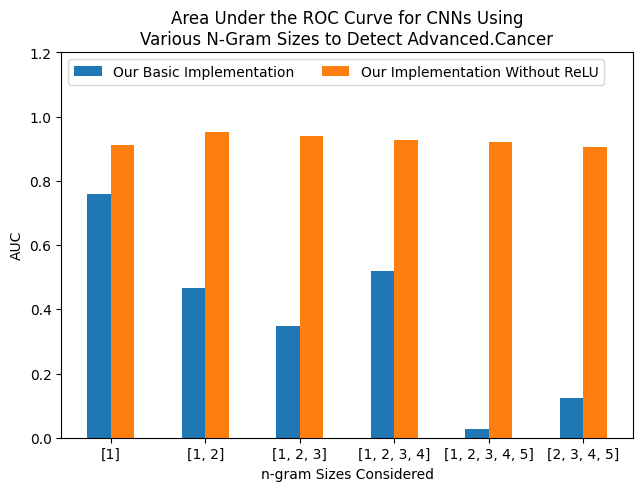

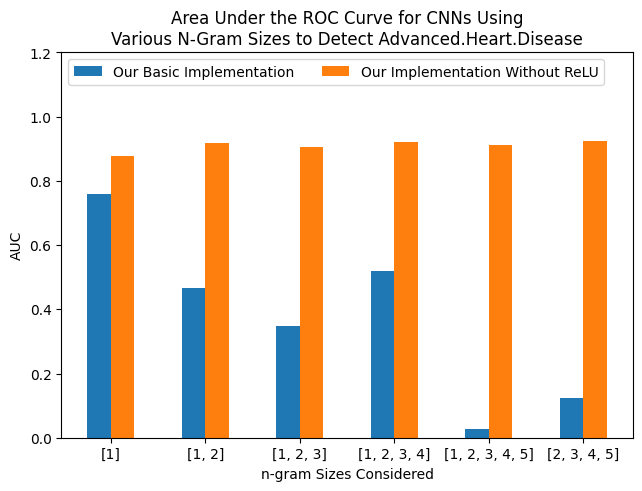

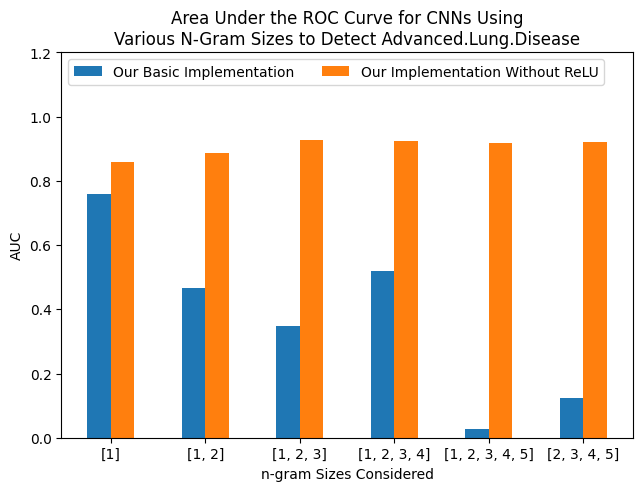

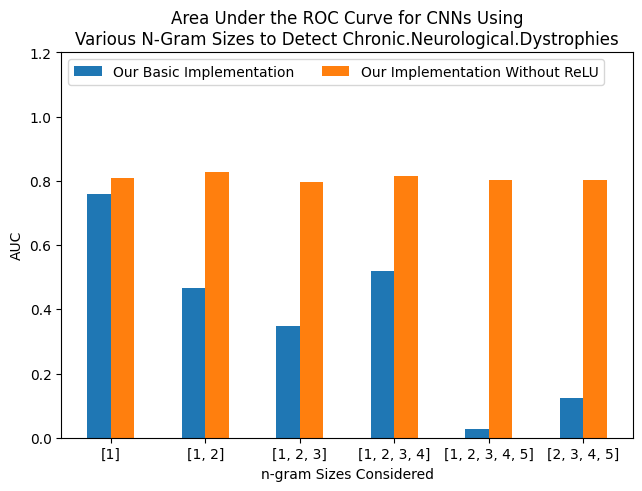

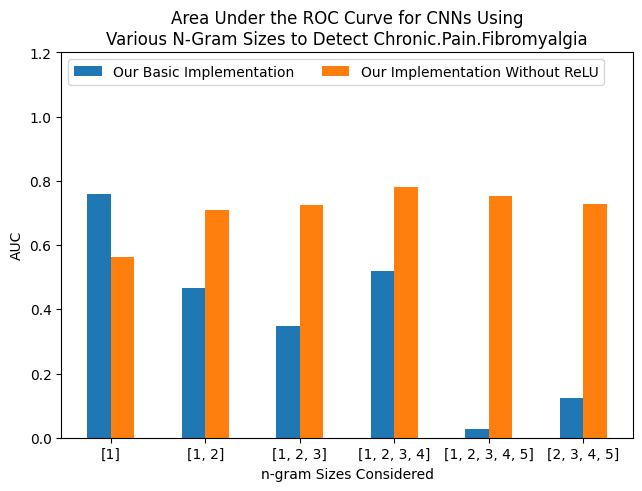

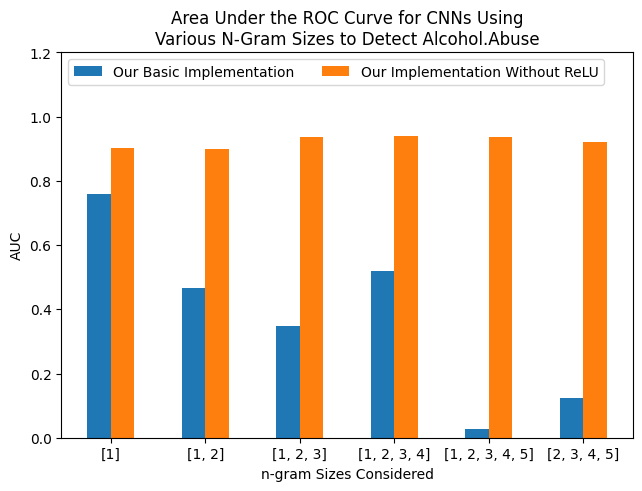

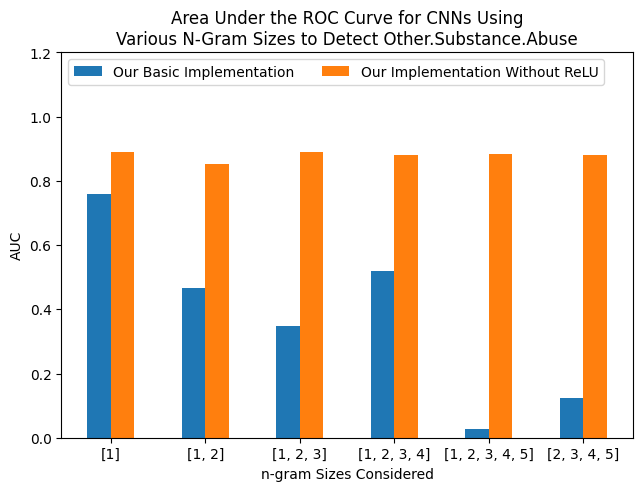

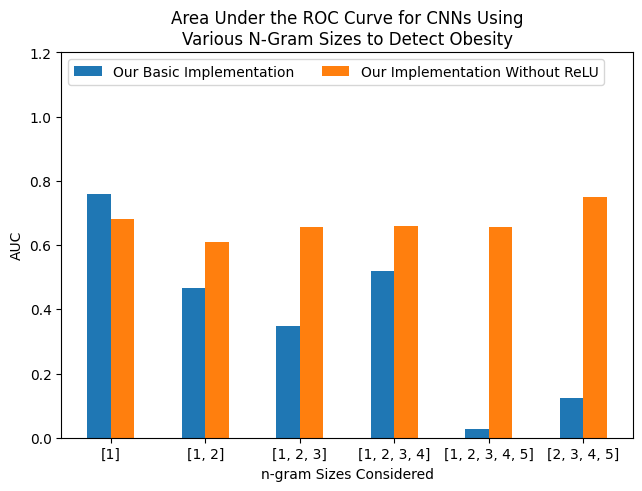

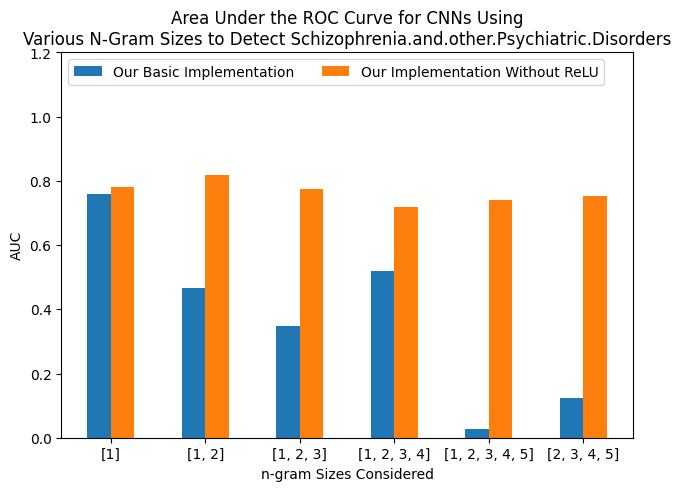

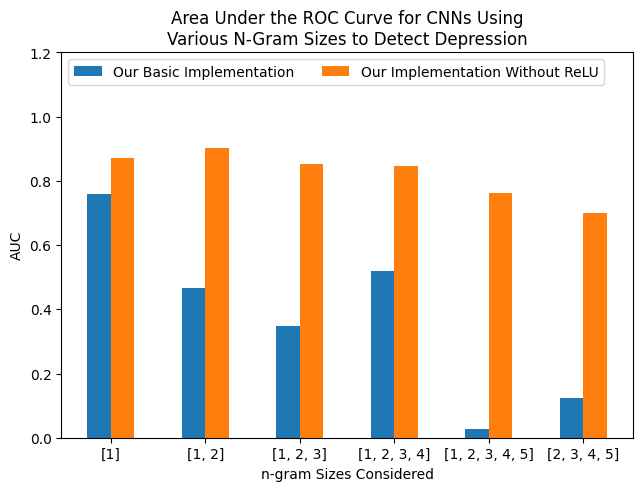

In [ ]:
for condition in results_dict.keys():
    # https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
    labels = results_dict[condition].keys()
    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0.5

    fig, ax = plt.subplots(layout='constrained')

    offset = width * multiplier
    our_aucs = [val["auc"] for val in results_dict[condition].values()]
    rects = ax.bar(x + offset, our_f1s, width, label = "Our Basic Implementation")
    multiplier += 1

    offset = width * multiplier
    no_relu_aucs = [val["auc"] for val in no_relu_results[condition].values()]
    rects = ax.bar(x + offset, no_relu_aucs, width, label = "Our Implementation Without ReLU")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('AUC')
    ax.set_title('Area Under the ROC Curve for CNNs Using\nVarious N-Gram Sizes to Detect ' + condition)
    ax.set_xticks(x + width, labels)
    ax.set_xlabel('n-gram Sizes Considered')
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, 1.2)
    
    plt.show()

Here, we load data describing the results of our second ablation, in which we removed the global max pooling operation (because we thought that throwing out all but one value from the results of each convolutional filter might discard too much information).

In [ ]:
with open("no_pooling_results.json", 'r') as f:
    no_pooling_results = json.load(f)
print(json.dumps(no_pooling_results, indent = 4))

{
    "Advanced.Cancer": {
        "[1]": {
            "training time": 16.351748943328857,
            "predicted percent positive": 0.0,
            "actual percent positive": 0.12313432835820895,
            "accuracy": 0.8768656716417911,
            "precision": 0.0,
            "recall": 0.0,
            "f1": 0.0,
            "auc": 0.6370083816892327
        },
        "[1, 2]": {
            "training time": 21.9148530960083,
            "predicted percent positive": 0.0,
            "actual percent positive": 0.12313432835820895,
            "accuracy": 0.8768656716417911,
            "precision": 0.0,
            "recall": 0.0,
            "f1": 0.0,
            "auc": 0.7400386847195358
        },
        "[1, 2, 3]": {
            "training time": 57.352721214294434,
            "predicted percent positive": 0.0037313432835820895,
            "actual percent positive": 0.12313432835820895,
            "accuracy": 0.8731343283582089,
            "precision": 0.0,
         

Here, we show bar charts comparing the F1-scores of our implementation of the CNNs proposed by the paper with the pooling to the F1-scores of our implementation of the CNNs proposed by the paper without the pooling, for the ten conditions of interest.

You can see that removing the pooling is really bad for F1-score.

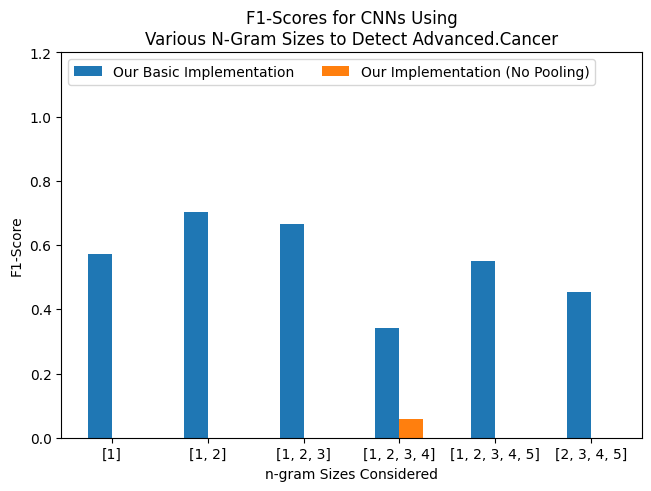

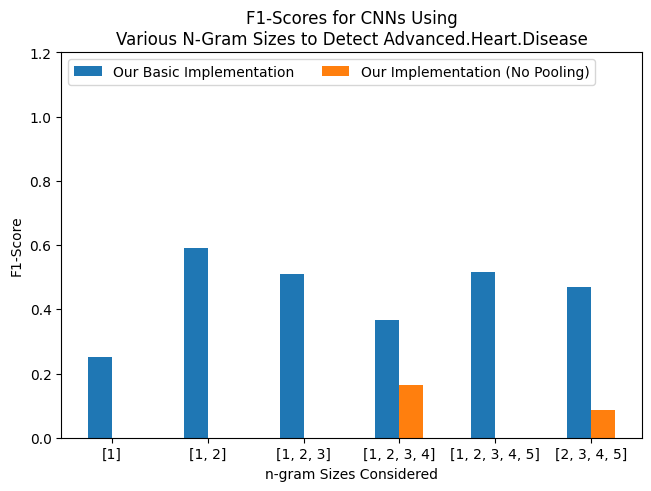

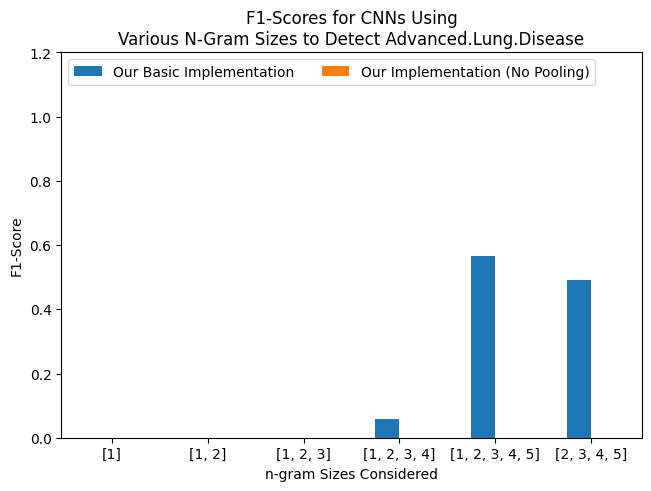

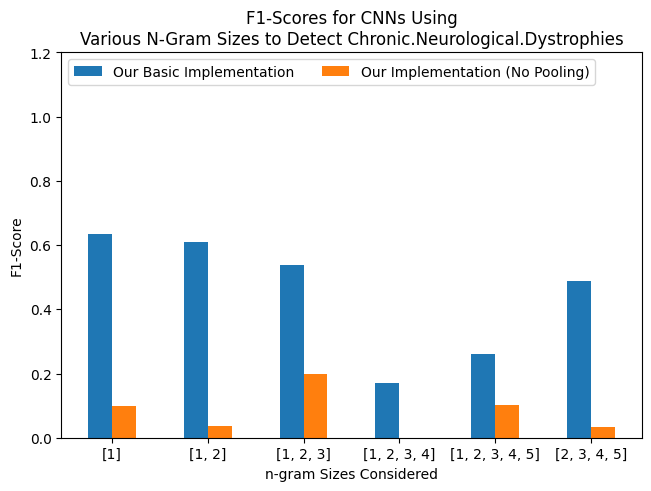

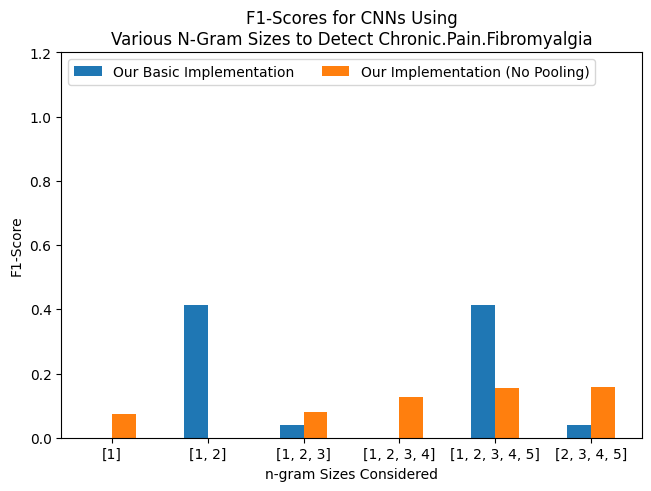

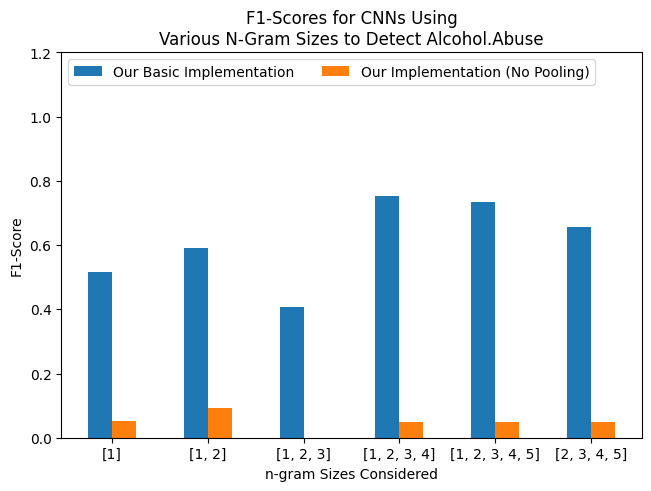

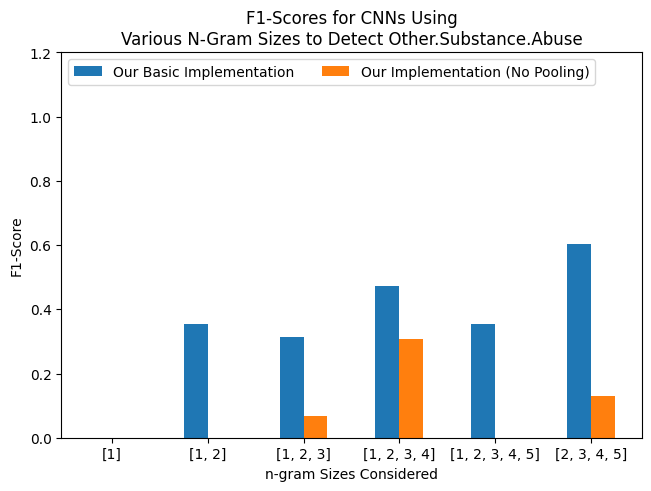

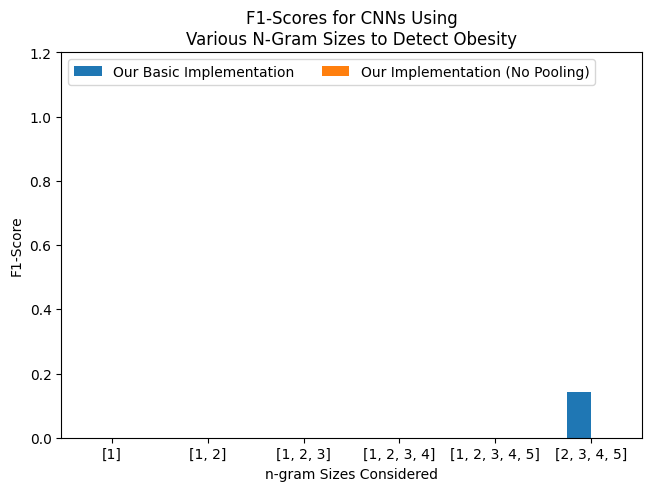

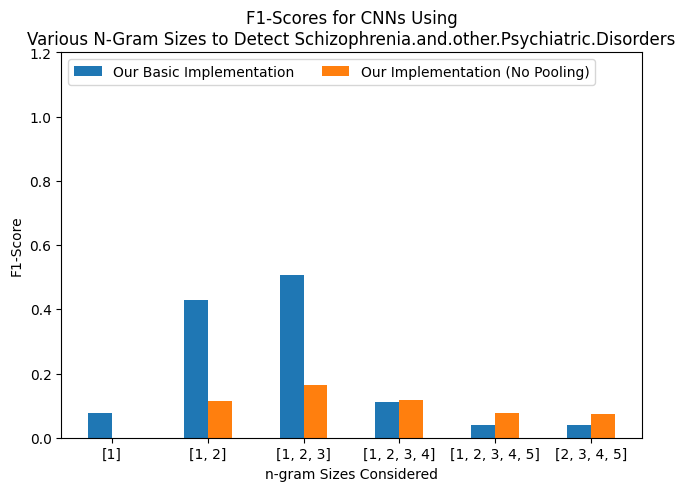

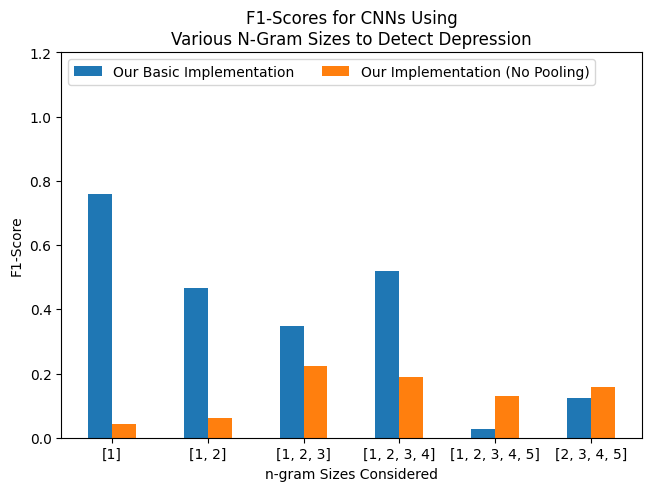

In [ ]:
for condition in results_dict.keys():
    # https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
    labels = results_dict[condition].keys()
    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0.5

    fig, ax = plt.subplots(layout='constrained')

    offset = width * multiplier
    our_f1s = [val["f1"] for val in results_dict[condition].values()]
    rects = ax.bar(x + offset, our_f1s, width, label = "Our Basic Implementation")
    multiplier += 1

    offset = width * multiplier
    no_pooling_f1s = [val["f1"] for val in no_pooling_results[condition].values()]
    rects = ax.bar(x + offset, no_pooling_f1s, width, label = "Our Implementation (No Pooling)")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('F1-Score')
    ax.set_title('F1-Scores for CNNs Using\nVarious N-Gram Sizes to Detect ' + condition)
    ax.set_xticks(x + width, labels)
    ax.set_xlabel('n-gram Sizes Considered')
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, 1.2)
    
    plt.show()

Here, we show bar charts comparing the AUCs of our implementation of the CNNs proposed by the paper with the pooling to the AUCs of our implementation of the CNNs proposed by the paper without the pooling, for the ten conditions of interest.

You can see that removing pooling does not have too much of an impact on AUC. However, the massive decrease in F1-scores when pooling is removed indicates that the pooling is beneficial. We still think that using a smaller pooling size might be better, as it would help reduce the effects of translations while not discarding as much information, but we did not have the time to test this.

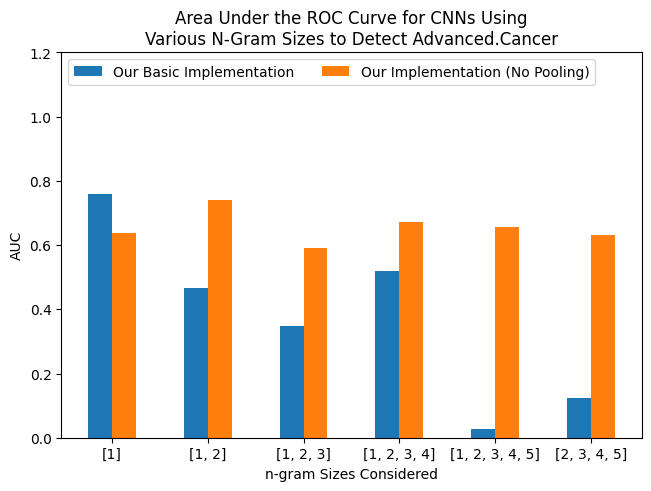

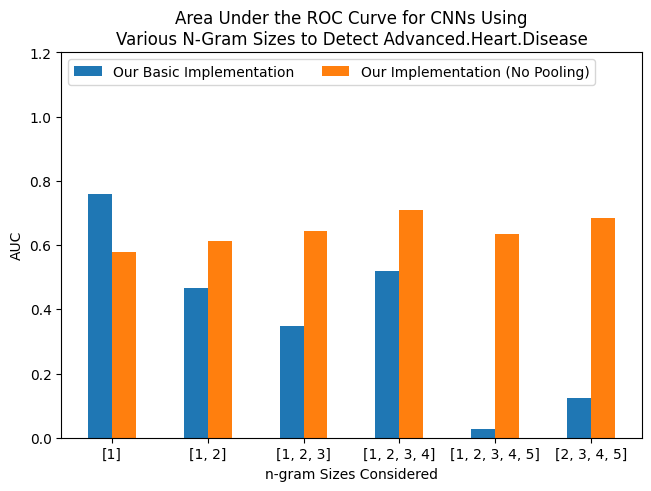

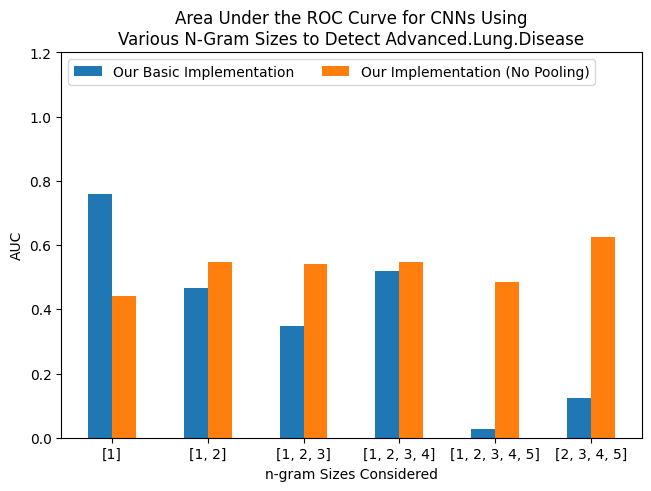

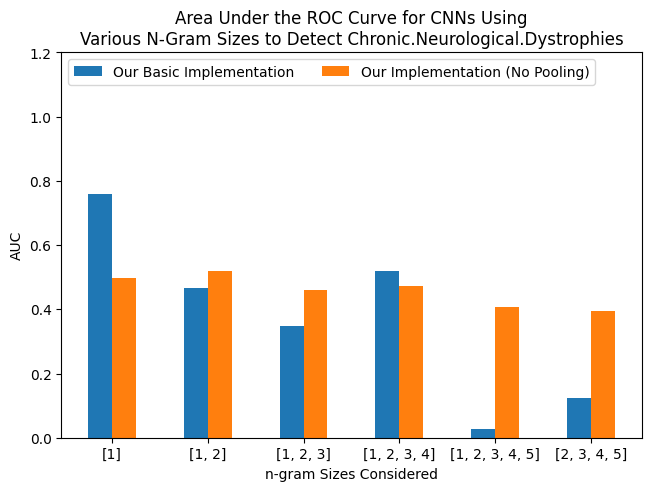

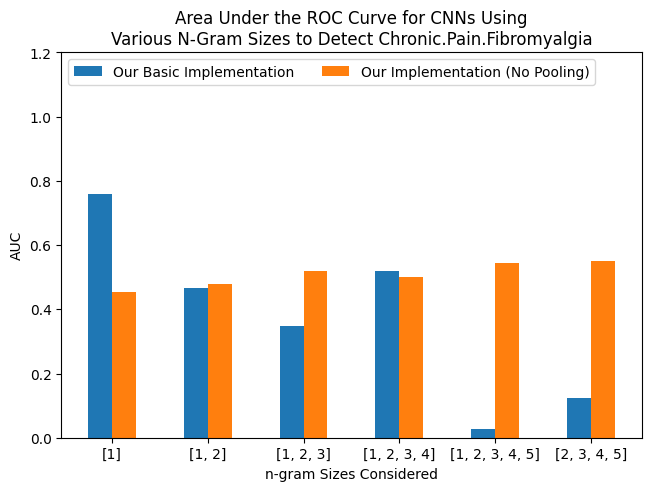

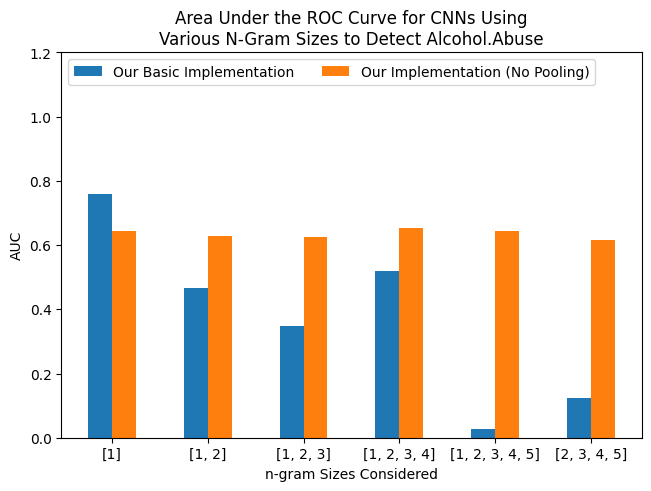

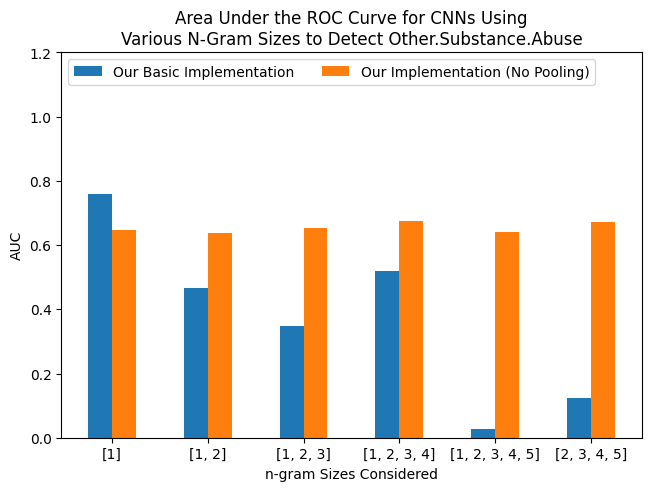

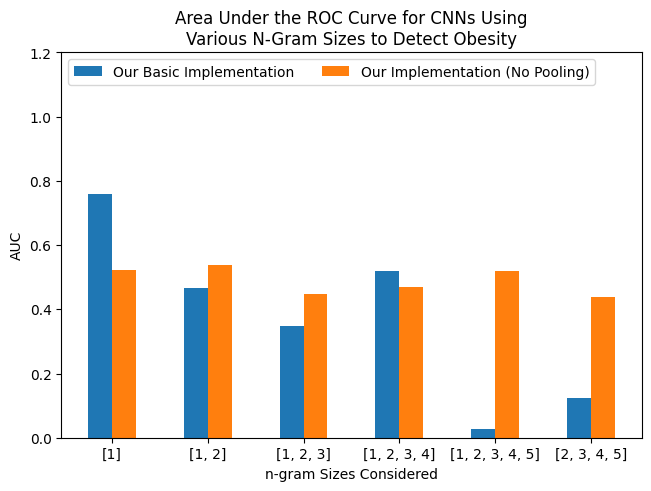

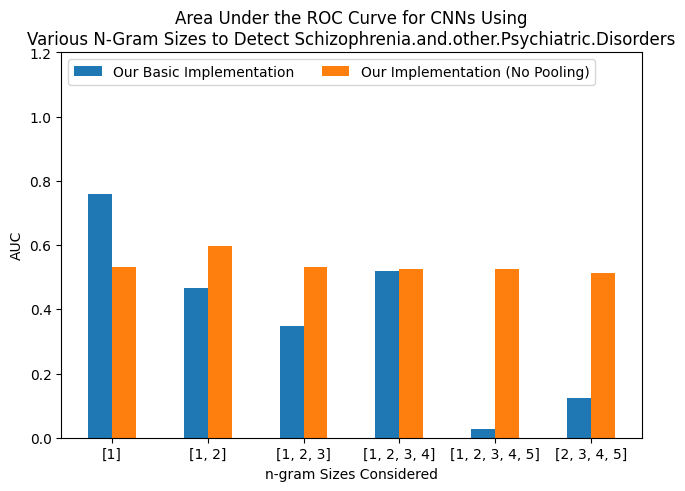

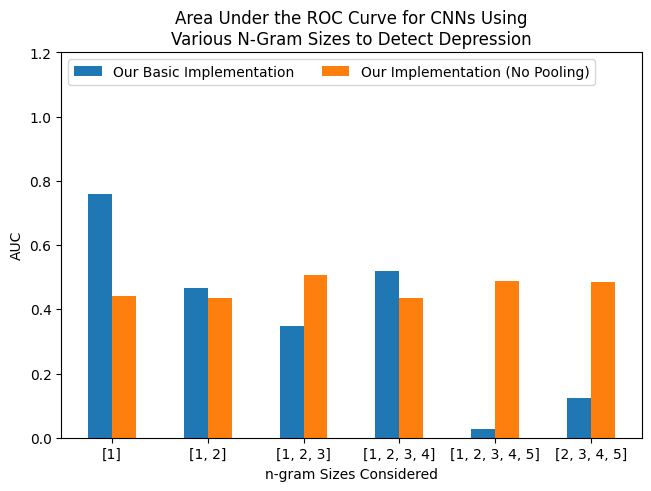

In [ ]:
for condition in results_dict.keys():
    # https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
    labels = results_dict[condition].keys()
    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0.5

    fig, ax = plt.subplots(layout='constrained')

    offset = width * multiplier
    our_aucs = [val["auc"] for val in results_dict[condition].values()]
    rects = ax.bar(x + offset, our_f1s, width, label = "Our Basic Implementation")
    multiplier += 1

    offset = width * multiplier
    no_pooling_aucs = [val["auc"] for val in no_pooling_results[condition].values()]
    rects = ax.bar(x + offset, no_pooling_aucs, width, label = "Our Implementation (No Pooling)")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('AUC')
    ax.set_title('Area Under the ROC Curve for CNNs Using\nVarious N-Gram Sizes to Detect ' + condition)
    ax.set_xticks(x + width, labels)
    ax.set_xlabel('n-gram Sizes Considered')
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, 1.2)
    
    plt.show()

All in all, the results of our replication study indicate that increasing the number and size of n-grams considered may boost the performance of CNNs following the architecture proposed in this paper, that the CNNs proposed in this paper are not better than baseline methods, and that the pooling step is neccesary. We are unsure about what the results of the first ablation mean. However, we have little confidence in these results, as the poor performance of our implementations of the CNNs compared to the performance observed by the paper's authors and the total failure of some of our models indicates to us that we have made mistakes with our implementation (to be fair, the provided code was unrunnable, basically undocumented, and written in Lua, which we do not know, so we had a hard time understanding it).